In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read in the data for white wine
df_w = pd.read_csv("winequality_white.csv", sep = ";")
df_w.head()

#create features, they are all numerical features
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
            "density", "pH", "sulphates", "alcohol"]
#create label name 
label = ["quality"]

In [421]:
#read in data for red wine
df_r = pd.read_csv("winequality_red.csv", sep=";")
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [422]:
df_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [423]:
df_w.dtypes;

In [424]:
df_w.shape

(4898, 12)

In [425]:
df_r.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [426]:
df_r.shape

(1599, 12)

In [427]:
df_r.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

1. I am trying to find the factors effect white/red wine quality the most.
2. The data came from 

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009

"""Citation Request:

Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009."""

3. The first dataset of white wine is (4898,12) and red wine is (1599, 12), they are i.i.d but they are not balanced as most of the wine are normal quality (around 5,6), jjst several extreme examples as poor or excellent.

4.the columns are 11 features and one label, features are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH ,sulphates, alcohol. The target variable(label) is quanlity. 11 features data type is float64, and target data type is int64 as showing above.

5. The method will be used: linear regression(probably not going to have good results, ridge regression, lasso regression(penalized regression), Partial least squares (PLS) regression, Binary Logistic Regression

Some thoughts: 
1. feature selection method?

In [428]:
len(features)

11

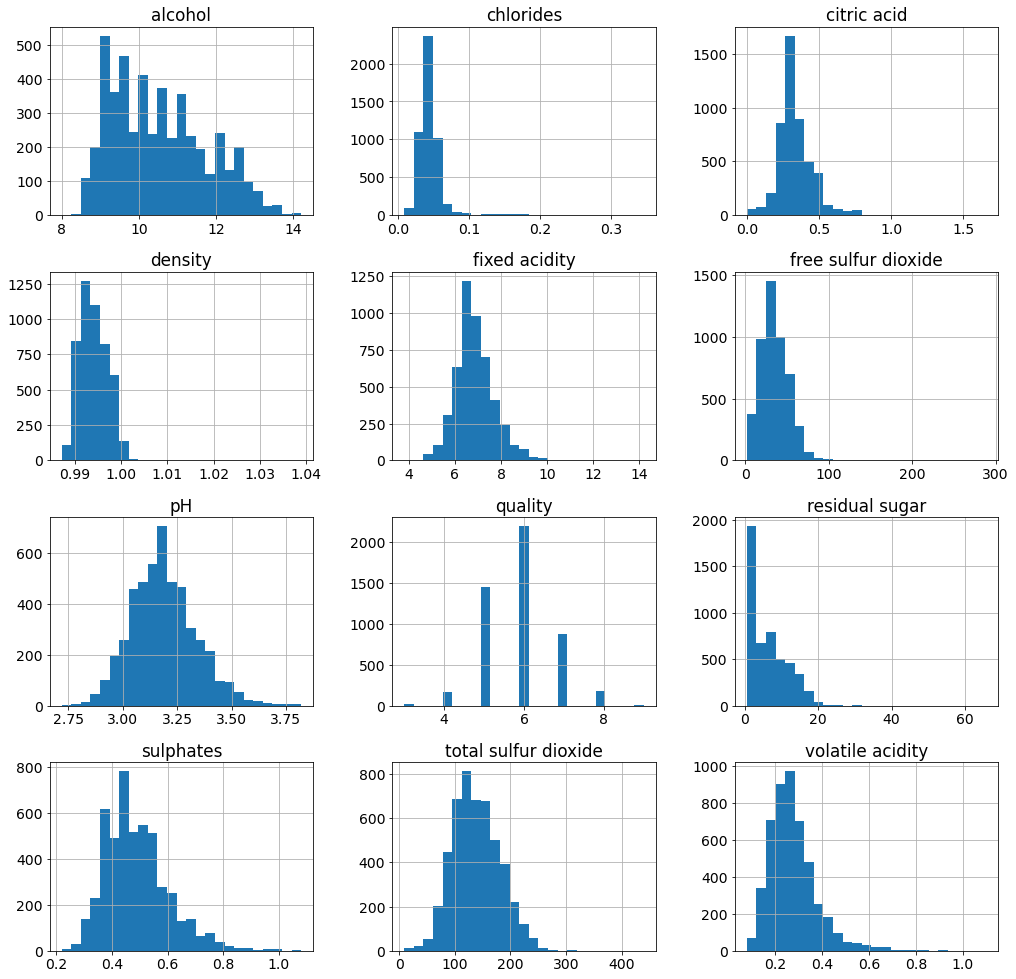

In [429]:
df_w.hist(figsize = (17,17), bins = 25)
plt.savefig("figures/histogram of each column_white.png")

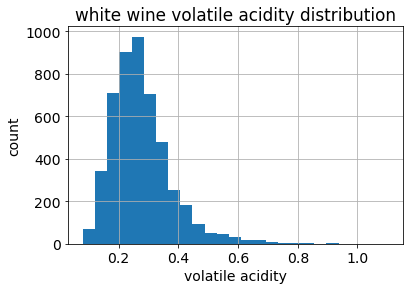

In [430]:
df_w.hist('volatile acidity', bins = 25)
plt.title('white wine volatile acidity distribution')
plt.xlabel('volatile acidity')
plt.ylabel('count')
plt.savefig('figures/ white volatile acidity distribution')

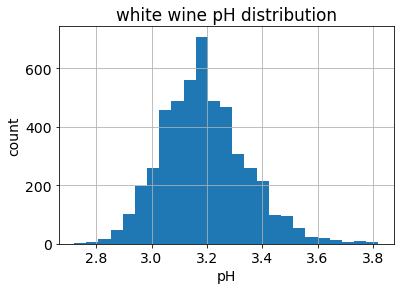

In [431]:
df_w.hist('pH', bins = 25)
plt.title('white wine pH distribution')
plt.xlabel('pH')
plt.ylabel('count')
plt.savefig('figures/ white pH distribution')

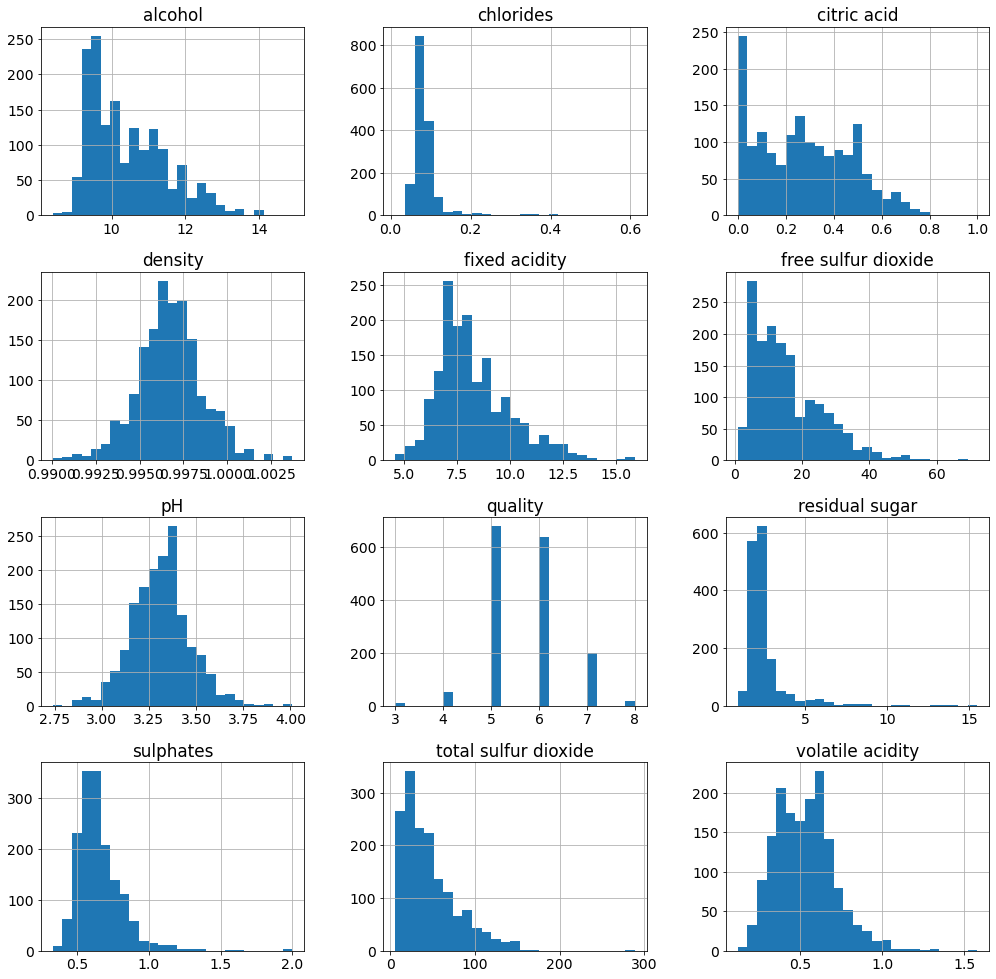

In [432]:
df_r.hist(figsize = (17,17), bins = 25)
plt.savefig("figures/histogram of each column_red.png")

From the hist we can see data is imbalanced, the quality is centered around 4-6 mainly.
Also, there are several features are tailed distributed so that we should use standard scaler when we preprocess the data. The features are alcohol, chlorides, fixed acidity, free sulfur dioxide, residual sugar, sulphates, total sulfur dioxide, volatile acidity.


In [433]:
df_w[label]

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [434]:
df_w['quality'].value_counts(normalize = True)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

In [435]:
df_r['quality'].value_counts(normalize = True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [436]:
#plot the relation between each feature and target variable scattering plots.(for white wine)
for i in range(len(features)):
    x = df_w[features[i]]
    y = df_w[label]
    plt.scatter(x, y, s = 5, alpha = 0.5)
    plt.xlabel(features[i])
    plt.ylabel('quality')
    #plt.show()
    plt.title('quality vs. {}'.format(features[i]))
    plt.savefig("figures/quality vs.{}.png".format(features[i]))  
    plt.clf()

<Figure size 432x288 with 0 Axes>

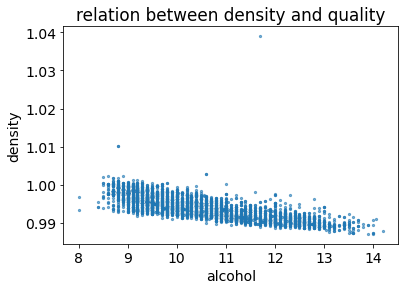

In [437]:
plt.scatter(df_w['alcohol'], df_w['density'], s = 5, alpha = 0.6)
plt.xlabel('alcohol')
plt.ylabel('density')
plt.title('relation between density and quality')
#plt.show()
plt.savefig("figures/alcohol vs. density (white).png")

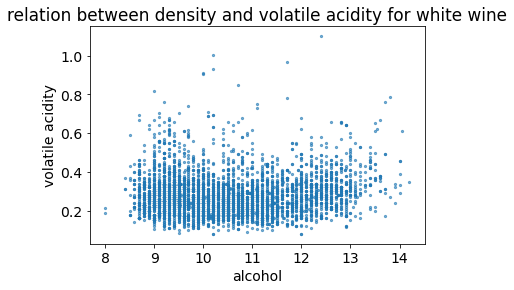

In [438]:
plt.scatter(df_w['alcohol'], df_w['volatile acidity'], s = 5, alpha = 0.6)
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('relation between density and volatile acidity for white wine')
#plt.show()
plt.savefig("figures/alcohol_vs. volatile acidity.png")

In [439]:
#plot the relation between each feature and target variable scattering plots.(for red wine)
for i in range(len(features)):
    x = df_r[features[i]]
    y = df_r[label]
    plt.scatter(x, y, s = 5, alpha = 0.5)
    plt.xlabel(features[i])
    plt.ylabel('quality')
    #plt.show()
    plt.savefig("figures/red_quality vs.{}.png".format(features[i]))  
    plt.clf()

<Figure size 432x288 with 0 Axes>

divide by zero encountered in log10


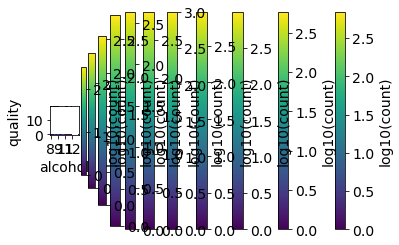

In [440]:
nbins = 20
for i in range(len(features)):
    heatmap, xedges, yedges = np.histogram2d(df_w[features[i]], df_w['quality'], bins = nbins)
    #plt.imshow(heatmap)
    plt.imshow(np.log10(heatmap).T, origin = 'lower')
    plt.xlabel(features[i])
    plt.ylabel('quality')
    plt.xticks(np.arange(nbins)[::int(nbins/4)], xedges[::int(nbins/4)].astype(int))
    plt.colorbar(label = 'log10(count)')
    #plt.show()
    #plt.savefig("figures/heatmap_quality vs.{}.png".format(features[i]))  
    #plt.clf()
    

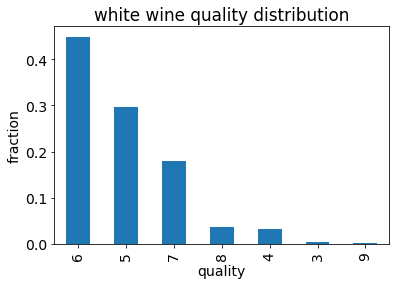

In [441]:
pd.value_counts(df_w['quality'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('quality')
plt.title('white wine quality distribution')
#plt.show()
plt.savefig("figures/quality distribution.png")  



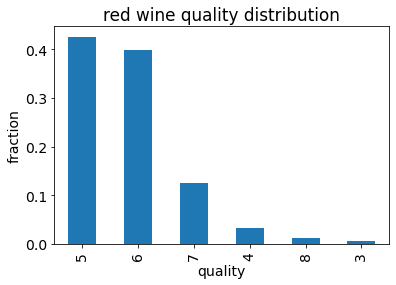

In [442]:
pd.value_counts(df_r['quality'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('quality')
plt.title('red wine quality distribution')
#plt.show()
plt.savefig("figures/red_quality distribution.png")  


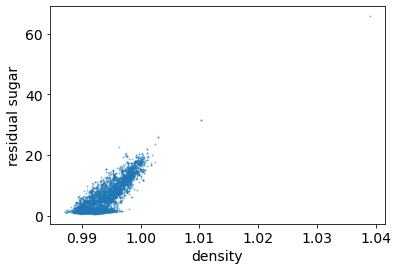

In [443]:
#correlation between features
df_w.plot.scatter('density', 'residual sugar', s = 1, alpha = 0.4)
#plt.show()
plt.savefig("figures/density vs. residual sugar.png")  


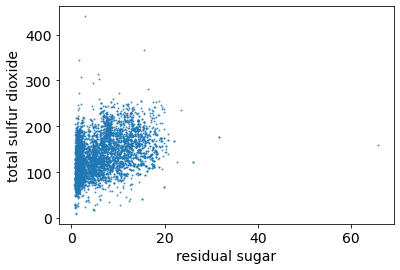

In [444]:
df_w.plot.scatter('residual sugar', 'total sulfur dioxide', s= 1, alpha=0.7)
#plt.show()
plt.savefig("figures/total sulfur dioxide vs. residual sugar.png")  


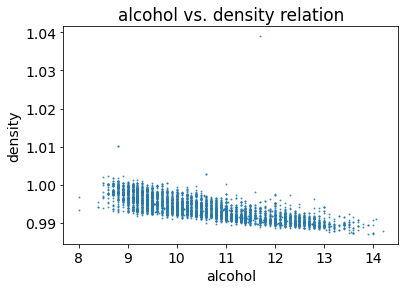

In [445]:
df_w.plot.scatter('alcohol', 'density', s= 1, alpha=0.7)
#plt.show()
plt.title('alcohol vs. density relation')
plt.savefig("figures/alcohol vs. density.png")  


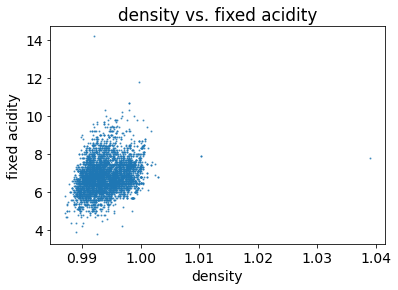

In [446]:
df_w.plot.scatter('density', 'fixed acidity', s= 1, alpha=0.7)
#plt.show()
plt.title('density vs. fixed acidity')
plt.savefig("figures/acidity vs. density.png") 

In [447]:
for i in range(len(features)):
    df_w.plot.scatter(features[i], 'quality', s=1, alpha = 0.7)
    plt.title('{} vs. quality (white)'.format(features[i]))
    #plt.show()
    plt.savefig("figures/quality vs.features/{} vs. quality.png".format(features[i])) 
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [448]:
for i in range(len(features)):
    df_r.plot.scatter(features[i], 'quality', s=1, alpha = 0.7)
    plt.title('{} vs. quality (red)'.format(features[i]))
    #plt.show()
    plt.savefig("figures/quality vs.features/{} vs.quality(red).png".format(features[i])) 
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [449]:
df_w1 = df_w[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
            "density", "pH", "sulphates", "alcohol", "quality"]]
#df_w1.shape[0]
#col = df_w1.columns
#print(col)
#print(df_w[label])
df_w1['quality'].value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [450]:
#create new category for their quality
df_w1.quality[df_w1.quality == 3 ] = 'bad'
df_w1.quality[df_w1.quality == 4 ] = 'bad'
df_w1.quality[df_w1.quality == 5 ] = 'normal'
df_w1.quality[df_w1.quality == 6 ] = 'normal'
df_w1.quality[df_w1.quality == 7 ] = 'normal'
df_w1.quality[df_w1.quality == 8 ] = 'good'
df_w1.quality[df_w1.quality == 9 ] = 'good'





A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [451]:
df_w1['quality'].value_counts()

normal    4535
bad        183
good       180
Name: quality, dtype: int64

In [452]:
categories = df_w1['quality'].unique()
print(categories)

['normal' 'good' 'bad']


In [453]:
for i in range(len(features)):
    bin_range = (df_w1[features[i]].min(), df_w1[features[i]].max())
    for c in categories:
        plt.hist(df_w1[df_w1['quality'] == c][features[i]], alpha = 0.4, label = c, range =bin_range, bins = 20, density = True )
    plt.legend()
    plt.xlabel(features[i])
    plt.ylabel('counts')
    plt.title('white wine quality distribution vs.{}'.format(features[i]))
    #plt.show()
    plt.savefig("figures/3hist_quality vs.{}.png".format(features[i]))  
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [454]:
df_r1 = df_r[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
            "density", "pH", "sulphates", "alcohol", "quality"]]


df_r1.quality[df_r1.quality == 3 ] = 'bad'
df_r1.quality[df_r1.quality == 4 ] = 'bad'
df_r1.quality[df_r1.quality == 5 ] = 'normal'
df_r1.quality[df_r1.quality == 6 ] = 'normal'
df_r1.quality[df_r1.quality == 7 ] = 'normal'
df_r1.quality[df_r1.quality == 8 ] = 'good'
df_r1.quality[df_r1.quality == 9 ] = 'good'

df_r1['quality'].value_counts()
categories1 = df_r['quality'].unique()
print(categories1)


[5 6 7 4 8 3]



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [455]:
for i in range(len(features)):
    bin_range = (df_r1[features[i]].min(), df_r1[features[i]].max())
    for c in categories1:
        plt.hist(df_r1[df_r1['quality'] == c][features[i]], alpha = 0.4, label = c, range =bin_range, bins = 20, density = True )
    plt.legend()
    plt.xlabel(features[i])
    plt.ylabel('counts')
    plt.title('red wine quality distribution vs.{}'.format(features[i]))
    #plt.show()
    plt.savefig("figures/red_3hist_quality vs.{}.png".format(features[i]))  
    plt.clf()

invalid value encountered in true_divide


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'volatile acidity distribution with different quality')

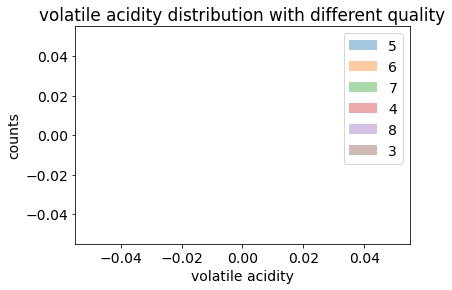

In [456]:
for c in categories1:
    plt.hist(df_r1[df_r1['quality'] == c]['volatile acidity'], alpha = 0.4, label = c, range =bin_range, bins = 20, density = True )
plt.legend()
plt.xlabel('volatile acidity')
plt.ylabel('counts')
plt.title('volatile acidity distribution with different quality')
#plt.show()

In [457]:
categories_all = df_w['quality'].unique()
print(categories_all)

for i in range(len(features)):
    bin_range = (df_w[features[i]].min(), df_w[features[i]].max())
    for c in categories_all:
        plt.hist(df_w[df_w['quality'] == c][features[i]], alpha = 0.4, label = c, range =bin_range, bins = 20, density = True )
    plt.legend()
    plt.xlabel(features[i])
    plt.ylabel('counts')
    plt.title('quality distribution vs.{}'.format(features[i]))
    #plt.show()\
    plt.savefig("figures/all_hist_quality vs.{}.png".format(features[i]))  
    plt.clf()

[6 5 7 8 4 3 9]


<Figure size 432x288 with 0 Axes>

[5 6 7 4 8 3]


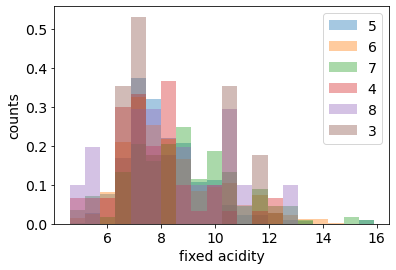

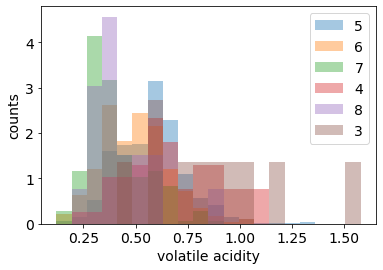

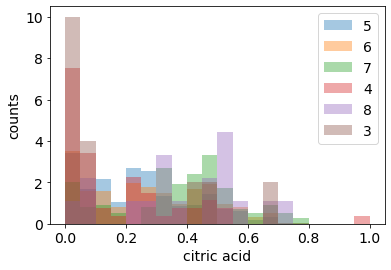

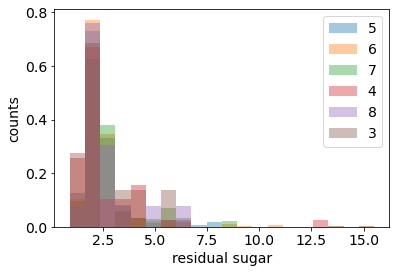

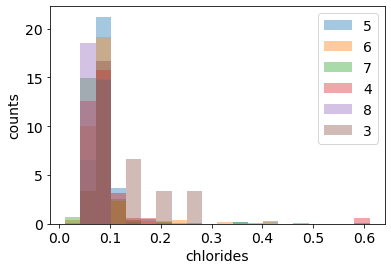

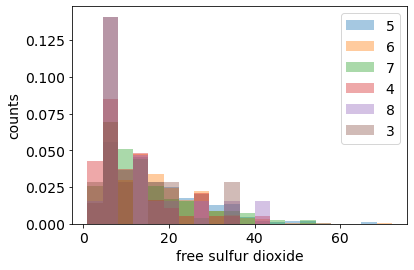

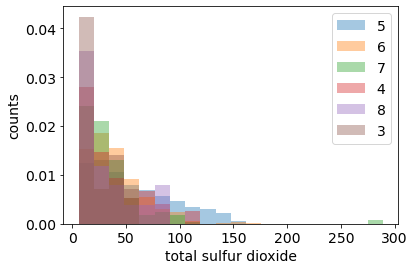

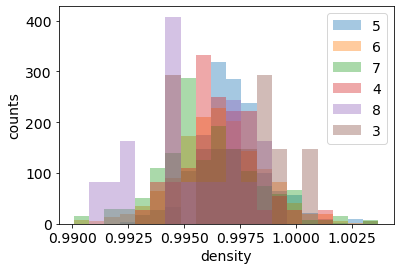

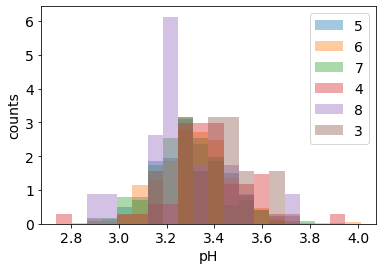

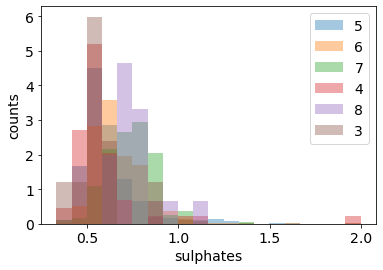

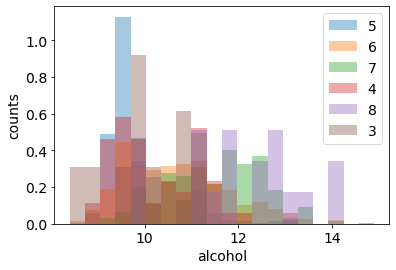

In [458]:
categories_all_red = df_r['quality'].unique()
print(categories_all_red)

for i in range(len(features)):
    bin_range = (df_r[features[i]].min(), df_r[features[i]].max())
    for c in categories_all_red:
        plt.hist(df_r[df_r['quality'] == c][features[i]], alpha = 0.4, label = c, range =bin_range, bins = 20, density = True )
    plt.legend()
    plt.xlabel(features[i])
    plt.ylabel('counts')
    plt.show()

In [304]:
#train test split with stratifying 

from sklearn.model_selection import StratifiedKFold, train_test_split
random_state = 47
X= df_w.loc[:, df_w.columns != 'quality']
y= df_w['quality']
X_other, X_test, y_other, y_test = train_test_split(X, y, train_size = 0.6, stratify = y, random_state = random_state)
print('test balance:', y_test.value_counts(normalize = True))
kf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)
for train_index, val_index in kf.split(X_other, y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize = True))
    print('val balance:')
    print(y_val.value_counts(normalize = True))

test balance: 6    0.448980
5    0.297449
7    0.179592
8    0.035714
4    0.033163
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448417
5    0.297753
7    0.179775
8    0.035751
4    0.033197
3    0.004086
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448698
5    0.297090
7    0.179684
8    0.035733
4    0.033691
3    0.004084
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448417
5    0.298264
7    0.179775
8    0.035751
4    0.032686
3    0.004086
9    0.001021
Name: quality, dtype: float64
train balance:
6    0.448698
5    0.297601
7    0.179684
8    0.035733
4    0.033180
3    0.004084
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448417
5    0.297242
7    0.179775
8    0.035751
4    0.033708
3    0.004086
9    0.001021
Name: quality, dtype: float64


In [305]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#print(df_w.columns)
#print(df_r.columns)
num_frts = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'sulphates', 'alcohol','density', 'pH']

preprocessor = ColumnTransformer(
transformers = [
    ('standard', StandardScaler(), num_frts)
])
clf = Pipeline(steps= [('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#print(X_train.shape)
#print(X_train_prep.shape)

# le = LabelEncoder()
# y_train_prep = le.fit_transform(y_train)
# y_val_prep = le.transform(y_val)
# y_test_prep = le.transform(y_test)

# print(X_train_prep)

# print(y_val)
# print(len(y_val_prep))

In [306]:
from sklearn.model_selection import StratifiedKFold, train_test_split
random_state = 47
X_r= df_r.loc[:, df_r.columns != 'quality']
y_r = df_r['quality']

X_other_r, X_test_r, y_other_r, y_test_r = train_test_split(X_r, y_r, train_size = 0.6, stratify = y_r, random_state = random_state)
print('test balance:', y_test_r.value_counts(normalize = True))
kf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)
for train_index, val_index in kf.split(X_other_r, y_other_r):
    X_train_r = X_other_r.iloc[train_index]
    y_train_r = y_other_r.iloc[train_index]
    X_val_r = X_other_r.iloc[val_index]
    y_val_r = y_other_r.iloc[val_index]
#     print('train balance:')
#     print(y_train_r.value_counts(normalize = True))
#     print('val balance:')
#     print(y_val_r.value_counts(normalize = True))


preprocessor = ColumnTransformer(
transformers = [
    ('standard', StandardScaler(), num_frts)
])
clf = Pipeline(steps= [('preprocessor', preprocessor)])

X_train_prep_r = clf.fit_transform(X_train_r)
X_val_prep_r = clf.transform(X_val_r)
X_test_prep_r = clf.transform(X_test_r)


print('y_train balance', y_train.value_counts(normalize=True))
print('y_val balance', y_val.value_counts(normalize=True))
print('y_test balance', y_test.value_counts(normalize=True))


print('X_train shape', X_train_prep.shape)

print('X_val shape', X_val_prep.shape)
print('X_test shape', X_test_prep.shape)

# le = LabelEncoder()
# y_train_prep_r = le.fit_transform(y_train_r)
# y_val_prep_r = le.transform(y_val_r)
# y_test_prep_r = le.transform(y_test_r)

#print(X_test_prep)

# print(y_val)
# print(y_val_prep)

# print(y_train.value_counts(normalize=True))
# print(y_val.value_counts(normalize=True))
# print(y_test.value_counts(normalize=True))

test balance: 5    0.426563
6    0.398438
7    0.125000
4    0.032813
8    0.010937
3    0.006250
Name: quality, dtype: float64
y_train balance 6    0.448698
5    0.297601
7    0.179684
8    0.035733
4    0.033180
3    0.004084
9    0.001021
Name: quality, dtype: float64
y_val balance 6    0.448417
5    0.297242
7    0.179775
8    0.035751
4    0.033708
3    0.004086
9    0.001021
Name: quality, dtype: float64
y_test balance 6    0.448980
5    0.297449
7    0.179592
8    0.035714
4    0.033163
3    0.004082
9    0.001020
Name: quality, dtype: float64
X_train shape (1959, 11)
X_val shape (979, 11)
X_test shape (1960, 11)


In [161]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import random
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder


### parameter tuning 

In [162]:
from sklearn.model_selection import StratifiedKFold

def MLpipe_KFold_R2(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 3 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    
    test_scores = []
    best_models = []
    
    random.seed(123)
    random_states = random.sample(list(np.arange(1,100)), 10)
    
    # loop through 10 random states (2 points)
    for random_state in random_states:        
    
        # split data to other/test 80/20, and the use KFold with 4 folds 
        X_other, X_test, y_other, y_test = train_test_split(X, y, stratify = y, train_size = 0.8)
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
        #kf = KFold(n_splits = 4, shuffle = True, random_state = random_state)


        # preprocess the data (1 point)
        pipe = make_pipeline(preprocessor, ML_algo)

        # loop through the hyperparameter combinations or use GridSearchCV 
        
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'r2',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        #print(grid.get_params().keys())

            
        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)
                
        
        # find which hyperparameter combination gives the best validation score
        best_models.append(grid)
        best_model = grid.best_params_
        best_score = grid.best_score_
        print("random_state =", random_state)
        print("best model is", best_model)
        print("best CV score is", best_score)
        
        # calculate the test score (1 point)
        y_test_pred = best_models[-1].predict(X_test)
        #mse = mean_squared_error(y_test, y_test_pred, squared = True)
        r2 = r2_score(y_test, y_test_pred)
        test_scores.append(r2)
        
        # append the test score and the best model to the lists 
        
    return best_models, test_scores

In [163]:
from sklearn.model_selection import StratifiedKFold

def MLpipe_KFold_MSE(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 3 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    
    test_scores = []
    best_models = []
    
    random.seed(123)
    random_states = random.sample(list(np.arange(1,100)), 10)
    
    # loop through 10 random states (2 points)
    for random_state in random_states:        
    
        # split data to other/test 80/20, and the use KFold with 4 folds 
        X_other, X_test, y_other, y_test = train_test_split(X, y, stratify = y, train_size = 0.8)
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
        #kf = KFold(n_splits = 4, shuffle = True, random_state = random_state)


        # preprocess the data (1 point)
        pipe = make_pipeline(preprocessor, ML_algo)

        # loop through the hyperparameter combinations or use GridSearchCV 
        
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'neg_mean_squared_error',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        #print(grid.get_params().keys())

            
        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)
                
        
        # find which hyperparameter combination gives the best validation score
        best_models.append(grid)
        best_model = grid.best_params_
        best_score = grid.best_score_
        print("random_state =", random_state)
        print("best model is", best_model)
        print("best CV score is", best_score)
        
        # calculate the test score (1 point)
        y_test_pred = best_models[-1].predict(X_test)
        #mse = mean_squared_error(y_test, y_test_pred, squared = True)
        mse = mean_squared_error(y_test, y_test_pred)
        test_scores.append(mse)
        
        # append the test score and the best model to the lists 
        
    return best_models, test_scores

### baseline model

In [164]:
# collect data from red wine dataset

X_r= df_r.loc[:, df_r.columns != 'quality']
y_r = df_r['quality']

X_w = df_w.loc[:, df_w.columns != 'quality']
y_w = df_w['quality']

In [165]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy_reg = DummyRegressor(strategy = "mean")
dummy_reg.fit(X_r, y_r)
y_pred_base = dummy_reg.predict(X_r)

red_base_score = mean_squared_error(y_r, y_pred_base, squared = True)
print('basaeline model mse of red wine dataset is', red_base_score)
dummy_reg.score(X_r, y_r)

basaeline model mse of red wine dataset is 0.6517605398308277


0.0

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy_reg_white = DummyRegressor(strategy = "mean")
dummy_reg_white.fit(X_w, y_w)
y_pred_base_white = dummy_reg_white.predict(X_w)

white_base_score = mean_squared_error(y_w, y_pred_base_white, squared = True)
print('baseline model mse of white is', white_base_score)

dummy_reg_white.score(X_w, y_w)

### baseline of classifier model

In [363]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_r, y_r)
dummy_clf.score(X_r, y_r)


0.425891181988743

In [365]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_w, y_w)
dummy_clf.score(X_w, y_w)

0.44875459371171905

### using kfold pipeline and gridsearchCV method on different models

### Lasso

In [167]:
# collect data from red wine dataset

X_r= df_r.loc[:, df_r.columns != 'quality']
y_r = df_r['quality']

X_w = df_w.loc[:, df_w.columns != 'quality']
y_w = df_w.loc[:, df_w.columns != 'quality']

model_compare = {}    # write each model performance into a dict
random.seed(123)


preprocessor = StandardScaler() # if you had a more complex dataset, you'd have a ColumnTransformer here
ML_algo = Lasso()
param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)
print('mean r2 score of test', np.mean(scores))
model_compare["Lasso"] = (np.mean(scores),np.std(scores))


# models1, scores1 = MLpipe_KFold_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
# print(scores1)
# print('mean r2 score of test', np.mean(scores1))
# model1_compare["Lasso"] = (np.mean(scores1),np.std(scores1))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'lasso__alpha': 0.01}
best CV score is 0.3488650507025491
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 35
best model is {'lasso__alpha': 0.001}
best CV score is 0.3381502858651048
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


random_state = 12
best model is {'lasso__alpha': 0.01}
best CV score is 0.32926767560843917
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 99
best model is {'lasso__alpha': 0.01}
best CV score is 0.34952780684737805
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


random_state = 53
best model is {'lasso__alpha': 0.001}
best CV score is 0.35040662907009557
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state =

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


 14
best model is {'lasso__alpha': 0.01}
best CV score is 0.3534184528455725
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 5
best model is {'lasso__alpha': 0.01}
best CV score is 0.34497744251722784
Fitting 5 folds for each of 7 candidates, totalling 35 fits

[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



random_state = 49
best model is {'lasso__alpha': 0.01}
best CV score is 0.34294311607738803
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


random_state = 69
best model is {'lasso__alpha': 0.01}
best CV score is 0.3429049627859422
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 72
best model is {'lasso__alpha': 0.01}
best CV score is 0.34519899876741383
[0.34805244115225253, 0.3916516395085212, 0.42827072679367784, 0.3338809711673414, 0.3479086762577962, 0.3431694906962368, 0.3475063922749959, 0.3614053301785385, 0.3603602111507088, 0.3624497670399842]
mean r2 score of test 0.36246556462200535


In [168]:
model_compare_mse = {}    # write each model performance into a dict
random.seed(123)


preprocessor = StandardScaler() # if you had a more complex dataset, you'd have a ColumnTransformer here
ML_algo = Lasso()
param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
print('std mse score of test', np.std(MSE))

model_compare_mse["Lasso"] = (np.mean(MSE),np.std(MSE))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 7
best model is {'lasso__alpha': 0.01}
best CV score is -0.42479682917784684
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s


random_state = 35
best model is {'lasso__alpha': 0.001}
best CV score is -0.41891725882966907
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 12
best model is {'lasso__alpha': 0.01}
best CV score is -0.4258992456949097
Fitting 5 folds for each of 7 candidates, totalling 35 fits

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished



random_state = 99
best model is {'lasso__alpha': 0.01}
best CV score is -0.42495613424758655
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


random_state = 53
best model is {'lasso__alpha': 0.001}
best CV score is -0.43052932097924035
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 14
best model is {'lasso__alpha': 0.0001}
best CV score is -0.4288778687363949
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s


random_state = 5
best model is {'lasso__alpha': 0.01}
best CV score is -0.4262024463729298
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state =

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s


 49
best model is {'lasso__alpha': 0.01}
best CV score is -0.42002080300994776
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state =

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


 69
best model is {'lasso__alpha': 0.001}
best CV score is -0.4172105963191911
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 72
best model is {'lasso__alpha': 0.001}
best CV score is -0.4267437190868443
[0.42762249260409196, 0.45072476735656225, 0.42625249071056165, 0.4315050263877205, 0.412343784204125, 0.3999277251438409, 0.43022740367599976, 0.44471908357673184, 0.4532318491343201, 0.4117321628221548]
mean mse score of test 0.42882867856161083
std mse score of test 0.016564953996207537


### Ridge regression 


In [169]:
from  sklearn.linear_model import Ridge
random.seed(123)

preprocessor = StandardScaler() 
ML_algo = Ridge()

param_grid = {'ridge__alpha': np.logspace(-10, 5,15)}

models, scores =MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)
model_compare["Ridge"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.34598402561521024
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3540255756317956
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3462864049017423
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.34593899513929893
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3533339023146528
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3545844855013076
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3507820707845479
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3546026116202486
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.3391188012747024
Fitting 5 folds for each of 15 candidates, totalling 75 fits
random_state = 72
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.363635624645488
[0.3589586764844068, 0.3235031675172291, 0.36328225882798126, 0.35663385513451007, 0.3363113207794428, 0.3294888625839, 0.336727643009745, 0.31484925123204655, 0.3815981414681039, 0.2776779065724828]
mean of the 10 random states test score 0.3379031083609848


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished


In [170]:
from  sklearn.linear_model import Ridge
random.seed(123)

preprocessor = StandardScaler() 
ML_algo = Ridge()

param_grid = {'ridge__alpha': np.logspace(-10, 5,15)}

models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
model_compare_mse["Ridge"] = (np.mean(MSE),np.std(MSE))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.41898644037833305
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'ridge__alpha': 5.179474679231202}
best CV score is -0.413610035681286
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.43019760588105493
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.4183960657471289
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.42709998275331146
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.42370077611181356
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.43433733388828816
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.4320494425822087
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.4318837876774227
Fitting 5 folds for each of 15 candidates, totalling 75 fits
random_state = 72
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.4211052301578153
[0.45102850795441823, 0.4670768206266661, 0.4141094936533453, 0.4437060063541106, 0.41956290700680443, 0.4470174401040035, 0.3929231276066419, 0.3898089450382973, 0.4040733421010973, 0.43374229312284207]
mean mse score of test 0.4263048883568226


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished


### linear regression with an elastic net

In [171]:
from sklearn.linear_model import ElasticNet
random.seed(123)


preprocessor = StandardScaler() 

ML_algo = ElasticNet()
param_grid = {'elasticnet__alpha': np.logspace(-10,0,10), 
             'elasticnet__l1_ratio': np.arange(0,1,0.01)}

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)

model_compare["ElasticNet"] = (np.mean(scores),np.std(scores))
print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))


# models1, scores1 = MLpipe_KFoldS_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
# print(scores1)
# print('mean r2 score of test', np.mean(scores1))
# model1_compare["Lasso"] = (np.mean(scores1),np.std(scores1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.99}
best CV score is 0.3543262193706483
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.02}
best CV score is 0.3376399373204219
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   17.7s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.3210115395592, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.0}
best CV score is 0.3527118801135285
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   14.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   14.8s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.01644292242787, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.0}
best CV score is 0.3502040132734893
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   16.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.02}
best CV score is 0.3456258664647198
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   16.4s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.5233511208188, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.0}
best CV score is 0.3466766563844138
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   17.0s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.1123934430588, tolerance: 0.08356684910086004
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.0}
best CV score is 0.35857883039198646
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   17.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.99}
best CV score is 0.33743097257888566
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 4904 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.52}
best CV score is 0.3511312948180033
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 4728 tasks      | elapsed:   30.5s


random_state = 72
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.91}
best CV score is 0.3506820995607728
[0.3322755492471804, 0.379691626382211, 0.31317924971595934, 0.3518681321952626, 0.34545943150582303, 0.36036594149428636, 0.2959571559769021, 0.39185902272891515, 0.35496263355135216, 0.3353367037441667]
mean of the 10 random states test score 0.3460955446542059
std of the 10 random states test score 0.027281999475304106


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   31.8s finished


In [172]:
from sklearn.linear_model import ElasticNet
random.seed(123)


preprocessor = StandardScaler() 

ML_algo = ElasticNet()
param_grid = {'elasticnet__alpha': np.logspace(-10,0,10), 
             'elasticnet__l1_ratio': np.arange(0,1,0.01)}

models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
model_compare_mse["ElasticNet"] = (np.mean(MSE),np.std(MSE))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 4248 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   28.3s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 267.0582551069746, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.0}
best CV score is -0.4121479574278787
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   23.8s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.4902559835779, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.0}
best CV score is -0.426734502851033
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   20.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.07}
best CV score is -0.4317785035247895
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.6s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 273.7365142102715, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'elasticnet__alpha': 0.07742636826811278, 'elasticnet__l1_ratio': 0.0}
best CV score is -0.4249201823070924
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   20.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.71}
best CV score is -0.4317075882593467
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   20.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.72}
best CV score is -0.4280871771873415
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.99}
best CV score is -0.43361884003224044
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 4985 out of 5000 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.1s finished
Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.0220982345418, tolerance: 0.08356684910086006
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.0}
best CV score is -0.42951423759384894
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   20.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.99}
best CV score is -0.4243716840408315
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   13.7s


random_state = 72
best model is {'elasticnet__alpha': 0.005994842503189421, 'elasticnet__l1_ratio': 0.43}
best CV score is -0.4281479728178631
[0.4710602219719024, 0.40773684342698735, 0.40919486710663583, 0.42748244932773377, 0.4044127331840864, 0.40984257148663694, 0.39398460114845757, 0.3949647034483581, 0.4292883557593788, 0.4029427399745925]
mean mse score of test 0.4150910086834769


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   21.0s finished


In [173]:
a = [0.4022411997386646, 0.3959048734652445, 0.3815365980974744, 0.41309835361167907, 0.4053252578519955, 0.44519204089807707, 0.4137177320244527, 0.4378524325881852, 0.4234042355892054, 0.44556755149782]
np.std(a)

0.02041008398106748

### Random forest

In [174]:
from sklearn.ensemble import RandomForestRegressor
random.seed(123)


preprocessor = StandardScaler() 

ML_algo = RandomForestRegressor()

param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)
model_compare["RandomForest"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))

# models1, scores1 = MLpipe_KFold_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
# print(scores1)
# print('mean r2 score of test', np.mean(scores1))
# model1_compare["Lasso"] = (np.mean(scores1),np.std(scores1))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.9s finished


random_state = 7
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.442340679158467
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.3s finished


random_state = 35
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.75}
best CV score is 0.47150747481414534
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.1s finished


random_state = 12
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.75}
best CV score is 0.4821471806255099
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.0s finished


random_state = 99
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.45687951117098546
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.0s finished


random_state = 53
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4690928771890258
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.0s finished


random_state = 14
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.75}
best CV score is 0.4461522426714389
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.0s finished


random_state = 5
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.45258515624619056
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.1s finished


random_state = 49
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4591002775986233
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.9s finished


random_state = 69
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4812716917417582
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.9s finished


random_state = 72
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4856298424003548
[0.5172172649676132, 0.45816235849627707, 0.39838295296325443, 0.49971063623706036, 0.4686322416611175, 0.5276295175252739, 0.5318888552575822, 0.4966145650463103, 0.48393292572189606, 0.4676239481808826]
mean of the 10 random states test score 0.4849795266057268
std of the 10 random states test score 0.037681335695721734


### mse scores of RF

In [175]:
from sklearn.ensemble import RandomForestRegressor
random.seed(123)


preprocessor = StandardScaler() 

ML_algo = RandomForestRegressor()

param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
model_compare_mse["RandomForest"] = (np.mean(MSE),np.std(MSE))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.2s finished


random_state = 7
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3435544316789216
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.3s finished


random_state = 35
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3463779335171569
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.6s finished


random_state = 12
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 1.0}
best CV score is -0.34324695098039215
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.5s finished


random_state = 99
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.75}
best CV score is -0.3487870490196079
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.0s finished


random_state = 53
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.32881992218137257
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.2s finished


random_state = 14
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3470506286764706
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.1s finished


random_state = 5
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.35317457781862743
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.0s finished


random_state = 49
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.35045273682598044
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    9.5s finished


random_state = 69
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.34250219301470586
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.9s finished


random_state = 72
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3524079007352941
[0.3413146875, 0.34500718750000003, 0.35677531250000005, 0.3264475, 0.3414975, 0.34879437499999993, 0.32214875000000004, 0.3250040625, 0.31823968750000003, 0.28397749999999994]
mean mse score of test 0.33092065625


### Support Vector Machine

In [176]:
from sklearn.svm import SVR
random.seed(123)

preprocessor = StandardScaler() 

ML_algo = SVR()

param_grid = {
              'svr__C': np.logspace(-10 ,5,15),
                'svr__gamma': np.logspace(-5,4,num=8)
              }

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)
model_compare["SVR"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))

# models1, scores1 = MLpipe_KFold_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
# print(scores1)
# print('mean r2 score of test', np.mean(scores1))
# model1_compare["Lasso"] = (np.mean(scores1),np.std(scores1))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.368306534985728
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.4020806489675269
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.4082989057019192
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.2min finished


random_state = 99
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.37616453045076936
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.2min finished


random_state = 53
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.37323668159267925
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.7min finished


random_state = 14
best model is {'svr__C': 5.179474679231202, 'svr__gamma': 0.07196856730011529}
best CV score is 0.38012420952138515
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.3min finished


random_state = 5
best model is {'svr__C': 5.179474679231202, 'svr__gamma': 0.07196856730011529}
best CV score is 0.36932503447148546
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.0min finished


random_state = 49
best model is {'svr__C': 5.179474679231202, 'svr__gamma': 0.07196856730011529}
best CV score is 0.40092692615042613
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.3843853307906741
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.2s


random_state = 72
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is 0.36632100595024353
[0.42319916807361113, 0.36283869101439403, 0.31538758502354114, 0.39325389683883094, 0.42646803138629685, 0.38130210763855654, 0.43365701815959745, 0.35899591460677305, 0.36828105971382485, 0.409820771060863]
mean of the 10 random states test score 0.38732042435162894
std of the 10 random states test score 0.03533136714914634


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.5min finished


In [177]:
from sklearn.svm import SVR
random.seed(123)

preprocessor = StandardScaler() 

ML_algo = SVR()

param_grid = {
              'svr__C': np.logspace(-10 ,5,15),
                'svr__gamma': np.logspace(-5,4,num=8)
              }


models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
print('std of the 10 random states test score', np.std(MSE))

model_compare_mse["XGB"] = (np.mean(MSE),np.std(MSE))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.4114889094423505
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.4054988192583317
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.40734099153495373
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.40194716547324977
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.4022832016839216
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.4058037088253733
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.40267509135333945
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.39596907402851766
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'svr__C': 5.179474679231202, 'svr__gamma': 0.07196856730011529}
best CV score is -0.4080497858783412
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.4s


random_state = 72
best model is {'svr__C': 0.4393970560760786, 'svr__gamma': 0.07196856730011529}
best CV score is -0.3960624096085831
[0.3845177631860028, 0.37617229955811315, 0.3689292615469591, 0.41294361951569697, 0.4252393795979822, 0.3899969842671153, 0.40202001486095734, 0.43172710857519814, 0.40435526788636655, 0.39802225097874444]
mean mse score of test 0.3993923949973136
std of the 10 random states test score 0.019254483984988708


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.3min finished


### K nearest neighbors

In [178]:
from sklearn.neighbors import KNeighborsRegressor
random.seed(123)

preprocessor = StandardScaler() 

ML_algo = KNeighborsRegressor()

param_grid = {
              'kneighborsregressor__n_neighbors': [1, 3, 5, 10, 30, 50],
                'kneighborsregressor__weights': ['uniform','distance']
              }

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)

model_compare["K nearest neighbor"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))
print(scores)

# models1, scores1 = MLpipe_KFold_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
# print(scores1)
# print('mean r2 score of test', np.mean(scores1))
# model1_compare["k nearesr neighbors"] = (np.mean(scores1),np.std(scores1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4264944404125691
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished


random_state = 35
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.44499522696010807
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished


random_state = 12
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4364714875735139
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished


random_state = 99
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4516751007188704
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.44513159052282686
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.43350461086847114
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.435510202923384
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


random_state = 49
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.43054238296421693
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


random_state = 69
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4497559346287615
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


random_state = 72
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4392850057232285
mean of the 10 random states test score 0.47277278118562477
std of the 10 random states test score 0.014484972054753223
[0.4857064701590206, 0.48490565805761177, 0.4826077996186593, 0.4599879189071785, 0.47200908526171115, 0.46784817468858875, 0.5011851705078292, 0.4609802970813415, 0.45448517944055566, 0.458012058133751]


### mse scores of KNN

In [179]:
from sklearn.neighbors import KNeighborsRegressor
random.seed(123)

preprocessor = StandardScaler() 

ML_algo = KNeighborsRegressor()

param_grid = {
              'kneighborsregressor__n_neighbors': [1, 3, 5, 10, 30, 50],
                'kneighborsregressor__weights': ['uniform','distance']
              }

models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
model_compare_mse["knn"] = (np.mean(MSE),np.std(MSE))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.3675617464435384
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.36614779454964835
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.37621753852697537
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.3732928609619478
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished


random_state = 53
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.37322436808375653
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.3659672512644146
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


random_state = 5
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.37566011663733045
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.36404915229489654
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.3748584148141313
Fitting 5 folds for each of 12 candidates, totalling 60 fits
random_state = 72
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.3586291747980431
[0.3465463947939441, 0.33024068556238034, 0.32110565337133823, 0.3581729876887566, 0.3391000854106955, 0.3448585661110407, 0.3291698411111389, 0.3482901831217252, 0.32135566632658585, 0.36073334777645644]
mean mse score of test 0.33995734112740617


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


### XGBoost

In [180]:
import xgboost

random.seed(123)

preprocessor = StandardScaler() 

ML_algo = xgboost.XGBRegressor()

param_grid = {"xgbregressor__learning_rate": [0.03],
      "xgbregressor__n_estimators": [10000],
      "xgbregressor__seed": [0],
      "xgbregressor__reg_alpha": [0e0, 1e-3, 1e-2, 1e-1, 1e0, 1e2],
      "xgbregressor__reg_lambda": [0e0, 1e-3, 1e-2, 1e-1, 1e0, 1e2],
      "xgbregressor__missing": [np.nan], 
      "xgbregressor__max_depth": [1,3,10,30,100],
      "xgbregressor__colsample_bytree": [0.9],              
      "xgbregressor__subsample": [0.66]}

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)
model_compare["XGB"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 30.9min finished


random_state = 7
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.4701557494991417
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.2min finished


random_state = 35
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 1.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.47830164854638646
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.0min finished


random_state = 12
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.001, 'xgbregressor__reg_lambda': 0.001, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.4481392476629642
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.0min finished


random_state = 99
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 0.001, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.460779994550518
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.3min finished


random_state = 53
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 0.001, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.4606489614736734
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.1min finished


random_state = 14
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 100, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__reg_lambda': 0.01, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.5016397398083869
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.2min finished


random_state = 5
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 100, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__reg_lambda': 1.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.4738575917072511
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.3min finished


random_state = 49
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 100, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 0.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.48226778945097093
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.4min finished


random_state = 69
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.001, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.4611038308469606
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.1min finished


random_state = 72
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.001, 'xgbregressor__reg_lambda': 0.01, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is 0.4333830856282332
[0.5081496377123018, 0.47062583747889974, 0.5336216303729824, 0.504704488739515, 0.5420540084113852, 0.3899754474964139, 0.49752445103188037, 0.45702417682674557, 0.5268387122723912, 0.5254861362161327]
mean of the 10 random states test score 0.4956004526558647
std of the 10 random states test score 0.04357188911032167


### XGBoost mse scores

In [181]:
import xgboost

random.seed(123)

preprocessor = StandardScaler() 

ML_algo = xgboost.XGBRegressor()

param_grid = {"xgbregressor__learning_rate": [0.03],
      "xgbregressor__n_estimators": [10000],
      "xgbregressor__seed": [0],
      "xgbregressor__reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
      "xgbregressor__reg_lambda": [0e0, 1e-2, 1e-1, 1e0,1e1, 1e2],
      "xgbregressor__missing": [np.nan], 
      "xgbregressor__max_depth": [1,3,10,30,100],
      "xgbregressor__colsample_bytree": [0.9],              
      "xgbregressor__subsample": [0.66]}

models, MSE = MLpipe_KFold_MSE(X_r,y_r,preprocessor,ML_algo,param_grid)
print(MSE)
print('mean mse score of test', np.mean(MSE))
model_compare_mse["XGB"] = (np.mean(MSE),np.std(MSE))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.6min finished


random_state = 7
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__reg_lambda': 0.01, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.36264627778818775
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 41.0min finished


random_state = 35
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 100, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.0, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.3421828989874688
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 43.4min finished


random_state = 12
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 10.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.34594563948546425
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 41.6min finished


random_state = 99
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 0.01, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.3545731638777646
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 32.7min finished


random_state = 53
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 100, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 1.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.34775625628788165
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.7min finished


random_state = 14
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 1.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.3259317743012658
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.4min finished


random_state = 5
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.330599859452349
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 32.0min finished


random_state = 49
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.3730677913074068
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.9min finished


random_state = 69
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 10, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.3332155958328032
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 31.6min finished


random_state = 72
best model is {'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 30, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.0, 'xgbregressor__reg_lambda': 0.1, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}
best CV score is -0.33876218492185695
[0.3055099257178874, 0.3062337783495785, 0.2999524797570098, 0.27710660893709615, 0.35293807299795005, 0.3368053429743746, 0.3605232600733146, 0.2738532707510274, 0.3325941773477091, 0.3570664383201496]
mean mse score of test 0.32025833552260974


### XGBoost without cross validation

In [182]:
from collections import defaultdict 
param_result = defaultdict()
param_grid = {"learning_rate": [0.03],
      "n_estimators": [10000],
      "seed": [0],
      "reg_alpha": [0e0, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
      "reg_lambda": [0e0, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
      "missing": [np.nan], 
      "max_depth": [1,3,10,30,100],
      "colsample_bytree": [0.9],              
      "subsample": [0.66]}

PG = ParameterGrid(param_grid)
random_states = np.random.choice(100 ,10, replace = False)
random.seed(123)

for i in range(len(PG)): #loop different parameters
    print('paramater set', i)

    XGB = xgboost.XGBRegressor()
    pg = PG[i]
    print('pg is', pg)
    
    XGB.set_params(**pg)
    
    xgboost_r2 = []

    for random_state in random_states:

        X_other, X_test, y_other, y_test = train_test_split(X_r, y_r, stratify = y_r, random_state = random_state, train_size = 0.8)
        X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, stratify = y_other, random_state = random_state, train_size = 0.5)

        
        preprocessor = StandardScaler()

        X_train_prep = preprocessor.fit_transform(X_train)
        X_val_prep = preprocessor.transform(X_val)
        X_test_prep = preprocessor.transform(X_test)
        
        XGB.set_params(**ParameterGrid(param_grid)[i])
        XGB.fit(X_train_prep, y_train, early_stopping_rounds = 50, eval_set = [(X_val_prep, y_val)], verbose = False)
        y_val_pred = XGB.predict(X_val_prep)
        #print('    randon_state is ', random_state)
        #print('    the CV RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))
        #print('    the CV R2:', r2_score(y_val,y_val_pred))

        y_test_pred = XGB.predict(X_test_prep)
        #print('    the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
        #print('    the test R2:',r2_score(y_test,y_test_pred))

        xgboost_r2.append(r2_score(y_test,y_test_pred))
    print('mean of 10 random states test r2 is', np.mean(xgboost_r2))
        
    param_result[i] = np.mean(xgboost_r2)


        


#     XGB.set_params(**ParameterGrid(param_grid)[0])

#     XGB.fit(X_train,y_train,early_stopping_rounds=50,eval_set=[(X_val, y_val)], verbose=False)
#     y_val_pred = XGB.predict(X_val)
#     print('runtime = ', i)
#     print('the CV RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))
#     print('the CV R2:', r2_score(y_val,y_val_pred))

#     y_test_pred = XGB.predict(X_test)
#     print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
#     print('the test R2:',r2_score(y_test,y_test_pred))
    
#    xgboost_r2.append(r2_score(y_test,y_test_pred))
    
model_compare['xgboost'] = (np.mean(list(param_result.values())), np.std(list(param_result.values())))

paramater set 0
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.35680852413391273
paramater set 1
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.001, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.35685212252174753
paramater set 2
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.01, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.35703659161868534
paramater set 3
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.1, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3571891699068802
pa

mean of 10 random states test r2 is 0.3614983011149198
paramater set 33
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 10.0, 'reg_alpha': 1.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3650106977618594
paramater set 34
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 100.0, 'reg_alpha': 1.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.36656127185621196
paramater set 35
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.0, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.36343897738140774
paramater set 36
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.001, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 1, 'learning_rate': 0.03, 'colsample_bytree': 

mean of 10 random states test r2 is 0.3813641405963287
paramater set 66
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3799796105202566
paramater set 67
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.38683651188290685
paramater set 68
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3812035269377705
paramater set 69
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 100.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0

mean of 10 random states test r2 is 0.397328650531967
paramater set 99
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.001, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.396137664053606
paramater set 100
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.01, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3958684635117981
paramater set 101
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.1, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3909775686216426
paramater set 102
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0

mean of 10 random states test r2 is 0.3750981805831661
paramater set 132
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 100.0, 'reg_alpha': 1.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3686565952731894
paramater set 133
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.0, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.35496029425241044
paramater set 134
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.001, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.35496004116420243
paramater set 135
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.01, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_

mean of 10 random states test r2 is 0.3933767928374876
paramater set 165
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 30, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.394688713157298
paramater set 166
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 30, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3819156543092805
paramater set 167
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 100.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 30, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3710994605088578
paramater set 168
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.0, 'reg_alpha': 0.1, 'n_estimators': 10000, 'missing': nan, 'max_depth': 30, 'learning_rate': 0.03, 'colsample_bytre

mean of 10 random states test r2 is 0.39073391693441817
paramater set 198
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.01, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.39322358027929805
paramater set 199
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.1, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3937479372443987
paramater set 200
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 1.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.39166690293298256
paramater set 201
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 10.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_b

mean of 10 random states test r2 is 0.3681748884365374
paramater set 231
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.0, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3567649870842742
paramater set 232
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.001, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.3567026337519225
paramater set 233
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.01, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
mean of 10 random states test r2 is 0.35648223404527596
paramater set 234
pg is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 0.1, 'reg_alpha': 10.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 100, 'learning_rate': 0.03, 'colsampl

In [183]:
best = np.max(list(param_result.values()))
print('besr result of XGBoostregressor is', best)
id = np.argmax(list(param_result.values()))
print('best parameter set is', ParameterGrid(param_grid)[id])

besr result of XGBoostregressor is 0.39987271117599876
best parameter set is {'subsample': 0.66, 'seed': 0, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}


In [184]:
model_compare

{'Lasso': (0.36246556462200535, 0.026496299009156545),
 'Ridge': (0.3379031083609848, 0.027907281512425254),
 'ElasticNet': (0.3460955446542059, 0.027281999475304106),
 'RandomForest': (0.4849795266057268, 0.037681335695721734),
 'SVR': (0.38732042435162894, 0.03533136714914634),
 'K nearest neighbor': (0.47277278118562477, 0.014484972054753223),
 'XGB': (0.4956004526558647, 0.04357188911032167),
 'xgboost': (0.3387631122468758, 0.09445678514864715)}

In [185]:
model_compare_mse

{'Lasso': (0.42882867856161083, 0.016564953996207537),
 'Ridge': (0.4263048883568226, 0.024890662841759524),
 'ElasticNet': (0.4150910086834769, 0.021716846521071483),
 'RandomForest': (0.33092065625, 0.019755245831433028),
 'XGB': (0.32025833552260974, 0.03051569332169054),
 'knn': (0.33995734112740617, 0.01346570829245283)}

In [186]:
# dictionary of lists  
aa = model_compare
data = pd.DataFrame(aa) 
print(data)
# saving the dataframe  
data.to_csv('results/model_compare.csv')  

      Lasso     Ridge  ElasticNet  RandomForest       SVR  K nearest neighbor  \
0  0.362466  0.337903    0.346096      0.484980  0.387320            0.472773   
1  0.026496  0.027907    0.027282      0.037681  0.035331            0.014485   

        XGB   xgboost  
0  0.495600  0.338763  
1  0.043572  0.094457  


In [187]:
X_r= df_r.loc[:, df_r.columns != 'quality']
y_r = df_r['quality']

### k nearest neighbor parameter tuning without kolds

In [188]:
from collections import defaultdict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
random.seed(123)


param_result = defaultdict()
param_grid = {
              'n_neighbors': [1, 3, 5, 10, 30, 50,100],
                'weights': ['uniform','distance']
              }
PG = ParameterGrid(param_grid)
random_states = np.random.choice(100 ,10, replace = False)

for i in range(len(PG)): #loop different parameters
    print('paramater set', i)

    KNN = KNeighborsRegressor()
    pg = PG[i]
    print('pg is', pg)
    
    KNN.set_params(**pg)
    
    knn_r2 = []

    for random_state in random_states:

        X_other, X_test, y_other, y_test = train_test_split(X_r, y_r, stratify = y_r, random_state = random_state, train_size = 0.8)
        X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, stratify = y_other, random_state= random_state, train_size = 0.5)
    
        preprocessor = StandardScaler()

        X_train_prep = preprocessor.fit_transform(X_train)
        X_val_prep = preprocessor.transform(X_val)
        X_test_prep = preprocessor.transform(X_test)

        KNN.fit(X_train_prep, y_train)
        y_val_pred = KNN.predict(X_val_prep)
        #print('    randon_state is ', random_state)
        #print('    the CV RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))
        #print('    the CV R2:', r2_score(y_val,y_val_pred))

        y_test_pred = KNN.predict(X_test_prep)
        #print('    the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
        #print('    the test R2:',r2_score(y_test,y_test_pred))

        knn_r2.append(r2_score(y_test,y_test_pred))
    print('mean of 10 random states test r2 is', np.mean(knn_r2))
        
    param_result[i] = np.mean(knn_r2)


        

paramater set 0
pg is {'weights': 'uniform', 'n_neighbors': 1}
mean of 10 random states test r2 is -0.06979841394757547
paramater set 1
pg is {'weights': 'distance', 'n_neighbors': 1}
mean of 10 random states test r2 is -0.0697984139475755
paramater set 2
pg is {'weights': 'uniform', 'n_neighbors': 3}
mean of 10 random states test r2 is 0.19882155901285398
paramater set 3
pg is {'weights': 'distance', 'n_neighbors': 3}
mean of 10 random states test r2 is 0.2557439093966976
paramater set 4
pg is {'weights': 'uniform', 'n_neighbors': 5}
mean of 10 random states test r2 is 0.25399842605484607
paramater set 5
pg is {'weights': 'distance', 'n_neighbors': 5}
mean of 10 random states test r2 is 0.3216093083095147
paramater set 6
pg is {'weights': 'uniform', 'n_neighbors': 10}
mean of 10 random states test r2 is 0.2960542405714633
paramater set 7
pg is {'weights': 'distance', 'n_neighbors': 10}
mean of 10 random states test r2 is 0.36777301999513956
paramater set 8
pg is {'weights': 'uniform',

In [189]:
def ML_pipeline_kfold(X,y,random_state,n_folds, ML_algo, param_grid):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, features)])
    
    pipe = make_pipeline(preprocessor,ML_algo)

    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring = 'r2', return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

In [190]:
def ML_pipeline_kfold_mse(X,y,random_state,n_folds, ML_algo, param_grid):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, features)])
    
    pipe = make_pipeline(preprocessor,ML_algo)

    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring = 'neg_mean_squared_error', 
                        return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

### best knn model and score

In [327]:
random.seed(123)

ML_algo = KNeighborsRegressor()
param_grid = param_grid = {
              'kneighborsregressor__n_neighbors': [1, 3, 5, 10, 30, 50,100],
                'kneighborsregressor__weights': ['uniform','distance']
              }
knn, X_test, y_test = ML_pipeline_kfold(X_r, y_r, 47, 4, ML_algo, param_grid)

print(knn.best_score_)
print(knn.score(X_test,y_test))
print(knn.best_params_)

#save the cv results
results = pd.DataFrame(knn.cv_results_)
results.to_csv('results/Red/knn(red)')
#print(results)

#save the prediction
y_pred = knn.predict(X_test)
#print(y_pred)
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('results/Red/knn(red) prediction')


best_model = knn.best_estimator_
best_model

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  47 out of  56 | elapsed:   20.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  53 out of  56 | elapsed:   21.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   21.6s finished


0.43876692379102605
0.4728265324033226
{'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=50, weights='dis

array([5., 6., 7.])

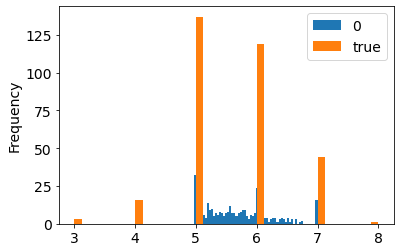

In [351]:
y_pred.plot.hist(bins = 60, label = 'prediction')

y_test.plot.hist(bins = 40, label = 'true')
plt.legend()

unique, counts = np.unique(l, return_counts=True)
unique

In [328]:
import pickle
file = open('results/Red/knn_model.save', 'wb')
pickle.dump((knn,X_test,y_test),file)
file.close()

In [315]:
random.seed(123)

ML_algo = KNeighborsRegressor()
param_grid = param_grid = {
              'kneighborsregressor__n_neighbors': [1, 3, 5, 10, 30, 50,100],
                'kneighborsregressor__weights': ['uniform','distance']
              }
knn, X_test, y_test = ML_pipeline_kfold_mse(X_r, y_r, 47, 4, ML_algo, param_grid)

print(knn.best_score_)
print(knn.score(X_test,y_test))
print(knn.best_params_)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1252s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  47 out of  56 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  53 out of  56 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.0s finished


-0.35969466053048543
-0.36498525545638716
{'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}


### KNN perutation importance

In [193]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

random.seed(123)


r = permutation_importance(knn, X_test, y_test, n_repeats = 30, random_state = 47)

knn_permutation_result = {}
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        knn_permutation_result[features[i]] = (r.importances_mean[i], r.importances_std[i])

permutation_im = pd.DataFrame(knn_permutation_result)
permutation_im.to_csv('results/knn_permutation_im_result.csv')  

alcohol 0.162 +/- 0.015
volatile acidity0.118 +/- 0.011
sulphates0.110 +/- 0.010
total sulfur dioxide0.103 +/- 0.007
density 0.089 +/- 0.007
free sulfur dioxide0.080 +/- 0.007
citric acid0.079 +/- 0.006
pH      0.074 +/- 0.005
fixed acidity0.071 +/- 0.006
chlorides0.069 +/- 0.005
residual sugar0.065 +/- 0.004


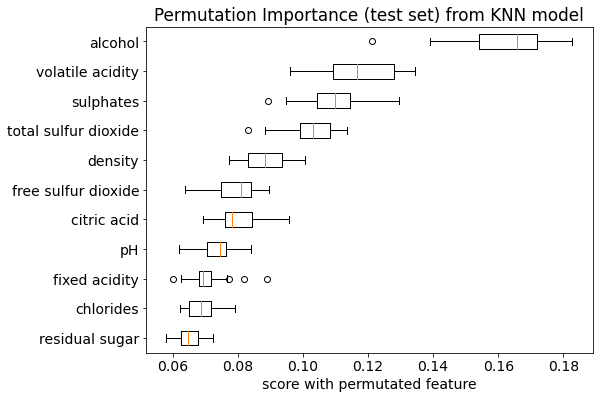

<Figure size 432x288 with 0 Axes>

In [194]:
random.seed(123)

scores = r.importances
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
sorted_indice = np.mean(scores, axis = 1).argsort()

plt.boxplot(x = scores[sorted_indice].T, labels = np.array(features)[sorted_indice], vert = False)
plt.title('Permutation Importance (test set) from KNN model')
plt.xlabel('score with permutated feature')
plt.show()
plt.savefig("figures/feature importance/permutation_importance_KNN.png")  


### Random Forest permutation importance(red)

In [195]:
from sklearn.ensemble import RandomForestRegressor

random.seed(123)
ML_algo = RandomForestRegressor()
param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

rf, X_test, y_test = ML_pipeline_kfold(X_r, y_r, 47, 4, ML_algo, param_grid)

print(rf.best_score_)
print(rf.score(X_test,y_test))
print(rf.best_params_)

# save the output 
import pickle
file = open('results/RF/grid.save', 'wb')
pickle.dump((rf,X_test,y_test),file)
file.close()

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    4.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.7s finished


0.45825258765104265
0.48735770706386816
{'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}


### experiment on RF classifier

In [352]:
def ML_pipeline_kfold_classifier(X,y,random_state,n_folds, ML_algo, param_grid):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, features)])
    
    pipe = make_pipeline(preprocessor,ML_algo)

    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, scoring = 'accuracy', return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

### random forest classifier(red)

In [459]:
from sklearn.ensemble import RandomForestClassifier
random.seed(123)
ML_algo = RandomForestClassifier()
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], 
              'randomforestclassifier__max_features': [0.5,0.75,1.0] 
              } 

y_r_prep = LabelEncoder().fit_transform(y_r)

rf, X_test, y_test = ML_pipeline_kfold_classifier(X_r, y_r_prep, 47, 4, ML_algo, param_grid)

print(rf.best_score_)
print(rf.score(X_test,y_test))
print(rf.best_params_)


Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:   11.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.4s finished


0.6732195336990595
0.6875
{'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 1.0}


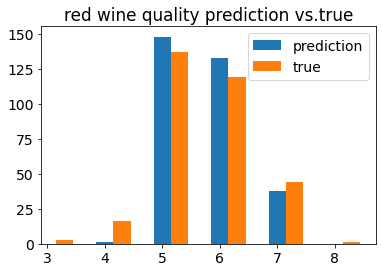

In [463]:
pred_red = rf.predict(X_test)

pred_red_origi = le.inverse_transform(pred_red)
true_red_origi = le.inverse_transform(y_test)

v1, c1 = np.unique(pred_red_origi, return_counts = True)
v2, c2 = np.unique(true_red_origi, return_counts = True)

width = 0.3
plt.bar(v1, height = c1, width = width, label = 'prediction')
plt.bar(v2 + width, height = c2, width = width, label = 'true')
plt.legend()
plt.title('red wine quality prediction vs.true')
plt.savefig('results/Red/RF_classcifier_output')
plt.savefig('figures/red_RF_classcifier_output')

### mse of RF

In [196]:
random.seed(123)
ML_algo = RandomForestRegressor()
param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

rf, X_test, y_test = ML_pipeline_kfold_mse(X_r, y_r, 7, 4, ML_algo, param_grid)

print(rf.best_score_)
print(rf.score(X_test,y_test))
print(rf.best_params_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    3.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished


-0.3590347565634796
-0.2768746875
{'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}


In [197]:
random.seed(123)

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

r = permutation_importance(rf, X_test, y_test, n_repeats = 30, random_state = 47, scoring = 'r2')

rf_permutation_result = {}
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        rf_permutation_result[features[i]] = (r.importances_mean[i],r.importances_std[i]) 

permutation_im_rf = pd.DataFrame(rf_permutation_result)
permutation_im_rf.to_csv('results/knn_permutation_im_result.csv') 

alcohol 0.387 +/- 0.055
sulphates0.217 +/- 0.029
volatile acidity0.118 +/- 0.017
total sulfur dioxide0.048 +/- 0.011
chlorides0.030 +/- 0.008
fixed acidity0.024 +/- 0.006
density 0.022 +/- 0.008
residual sugar0.021 +/- 0.004
citric acid0.017 +/- 0.006
free sulfur dioxide0.011 +/- 0.004


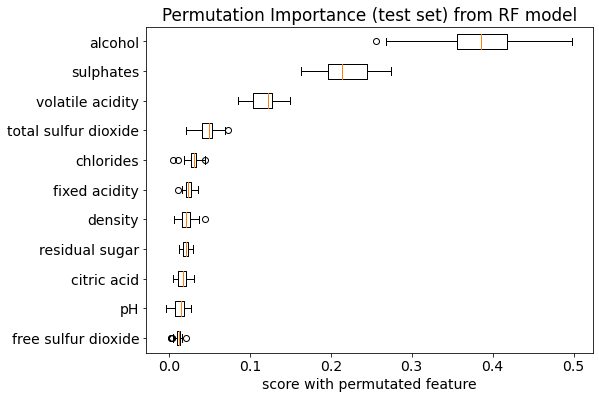

In [198]:
random.seed(123)

scores = r.importances
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
sorted_indice = np.mean(scores, axis = 1).argsort()

plt.boxplot(x = scores[sorted_indice].T, labels = np.array(features)[sorted_indice], vert = False)
plt.title('Permutation Importance (test set) from RF model')
plt.xlabel('score with permutated feature')
#plt.show()
plt.savefig("figures/feature importance/permutation_importance_RF.png")  


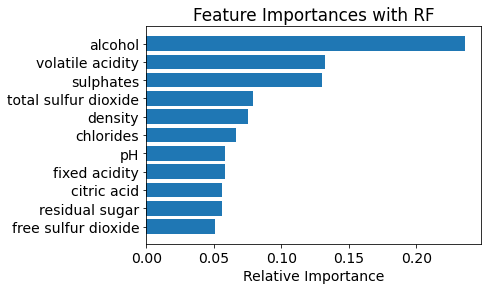

In [199]:
random.seed(123)

importances = rf.best_estimator_[1].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances with RF')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), np.array(features)[indices])
plt.xlabel('Relative Importance')
plt.savefig("figures/feature importance/buildin_f_importance_RF.png")  


### shap value of random forest

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


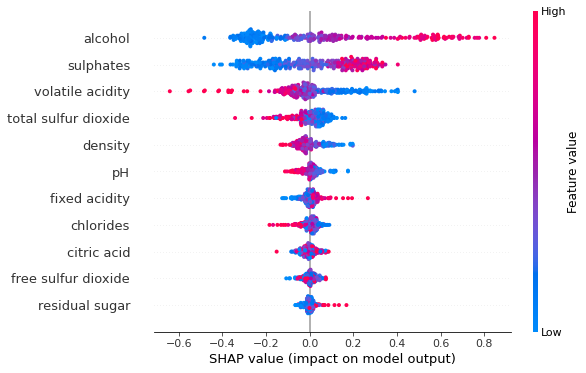

In [200]:
import shap
random.seed(123)

shap.initjs()
explainer = shap.TreeExplainer(rf.best_estimator_[1])
X_test_transformed = rf.best_estimator_[0].transform(X_test)
rf_shap_values = explainer.shap_values(X_test_transformed[:1000])
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,8))
shap.summary_plot(rf_shap_values, X_test, show = False)
plt.savefig("figures/feature importance/shap_values_RF.png")  


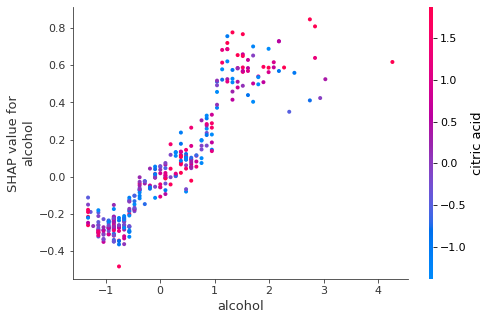

In [201]:
shap.dependence_plot("alcohol", rf_shap_values, X_test_transformed, feature_names = features, show = False)
plt.savefig("figures/feature importance/depen_al vs va_RF.png")  


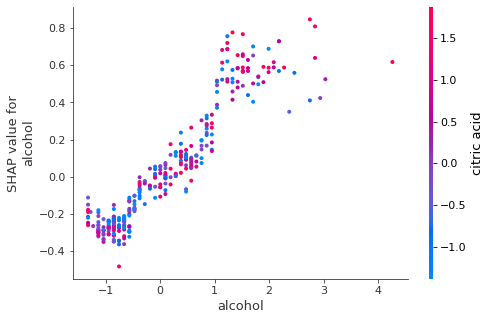

In [202]:
shap.dependence_plot("alcohol", rf_shap_values, X_test_transformed, feature_names = features,  show = False)
#plt.savefig("figures/feature importance/depen_su vs al_RF.png")  


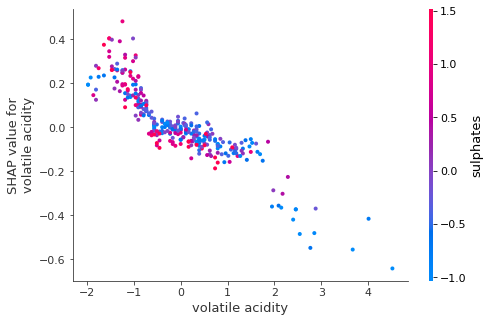

In [203]:
shap.dependence_plot("volatile acidity", rf_shap_values, X_test_transformed, feature_names = features,  show = False)
plt.savefig("figures/feature importance/depen_va vs su(red)_RF.png")  


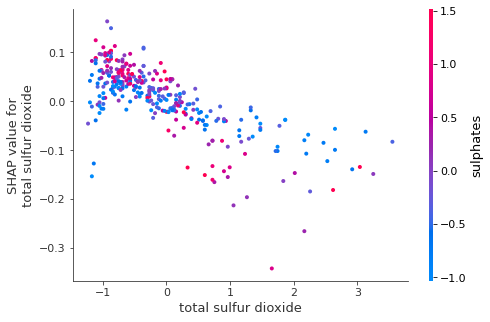

In [204]:
shap.dependence_plot("total sulfur dioxide", rf_shap_values, X_test_transformed, feature_names = features,  show = False)
plt.savefig("figures/feature importance/depen_tsd vs su_RF.png")  


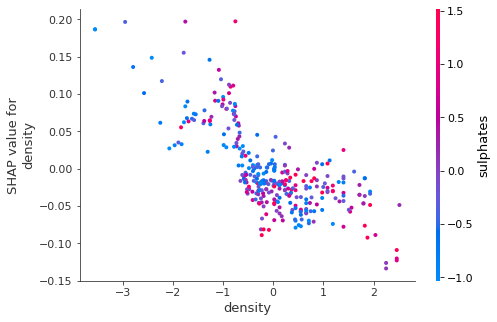

In [205]:
shap.dependence_plot("density", rf_shap_values, X_test_transformed, feature_names = features,  show = False)


In [206]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [207]:
import shap
# https://stackoverflow.com/questions/61928198/getting-unicodedecodeerror-when-using-shap-on-xgboost
booster = XGB.get_booster() 
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda : model_bytearray

shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(booster)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [208]:
import xgboost
random.seed(123)

ML_algo = xgboost.XGBRegressor()
param_grid = {"xgbregressor__learning_rate": [0.03],
      "xgbregressor__n_estimators": [10000],
      "xgbregressor__seed": [0],
      "xgbregressor__reg_alpha": [0e0, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
      "xgbregressor__reg_lambda": [0e0, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
      "xgbregressor__missing": [np.nan], 
      "xgbregressor__max_depth": [1,3,10,30,100],
      "xgbregressor__colsample_bytree": [0.9],              
      "xgbregressor__subsample": [0.66]}


xgbr, X_test, y_test = ML_pipeline_kfold(X_r, y_r, 47, 4, ML_algo, param_grid)



# save the output 
#import pickle
#file = open('results/RF/grid.save', 'wb')
#pickle.dump((grid,X_test,y_test),file)
#file.close()

Fitting 4 folds for each of 245 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

In [209]:
print(xgbr.best_score_)
print(xgbr.score(X_test,y_test))
print(xgbr.best_params_)

0.44720090518839195
0.5252764817429986
{'xgbregressor__colsample_bytree': 0.9, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 100, 'xgbregressor__missing': nan, 'xgbregressor__n_estimators': 10000, 'xgbregressor__reg_alpha': 0.1, 'xgbregressor__reg_lambda': 0.0, 'xgbregressor__seed': 0, 'xgbregressor__subsample': 0.66}


In [210]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

r = permutation_importance(xgbr, X_test, y_test, n_repeats = 30, random_state = 47, scoring = 'r2')

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

alcohol 0.276 +/- 0.037
sulphates0.171 +/- 0.031
volatile acidity0.097 +/- 0.022
total sulfur dioxide0.081 +/- 0.015
density 0.033 +/- 0.012
pH      0.033 +/- 0.007
chlorides0.030 +/- 0.010
free sulfur dioxide0.026 +/- 0.010
citric acid0.023 +/- 0.005
fixed acidity0.022 +/- 0.007


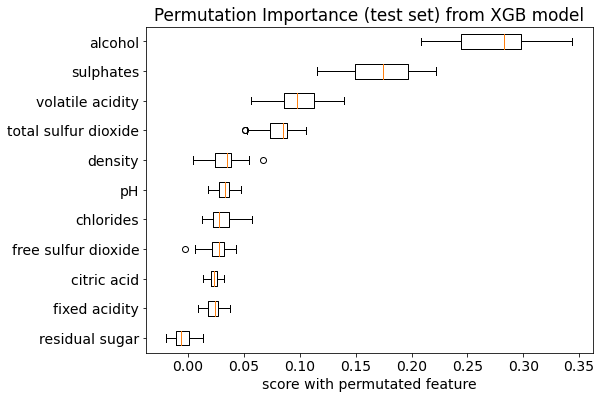

In [211]:
random.seed(123)

scores = r.importances
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
sorted_indice = np.mean(scores, axis = 1).argsort()

plt.boxplot(x = scores[sorted_indice].T, labels = np.array(features)[sorted_indice], vert = False)
plt.title('Permutation Importance (test set) from XGB model')
plt.xlabel('score with permutated feature')
#plt.show()
plt.savefig("figures/feature importance/permutation_importance_XGB.png")  


### white wine results

In [212]:
# read in data for white wine
X_w= df_w.loc[:, df_w.columns != 'quality']
y_w = df_w['quality']


In [214]:
### knn model
random.seed(123)

ML_algo = KNeighborsRegressor()
param_grid = param_grid = {
              'kneighborsregressor__n_neighbors': [1, 3, 5, 10, 30, 50,100],
                'kneighborsregressor__weights': ['uniform','distance']
              }
knn, X_test, y_test = ML_pipeline_kfold(X_w, y_w, 47, 4, ML_algo, param_grid)

print(knn.best_score_)
print(knn.score(X_test,y_test))
print(knn.best_params_)

# save the output 
import pickle
file = open('results/KNN/grid.save', 'wb')
pickle.dump((knn,X_test,y_test),file)
file.close()

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  47 out of  56 | elapsed:    5.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  53 out of  56 | elapsed:    6.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    6.3s finished


0.47249444412931607
0.51147867606604
{'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}


### KNN classifier(white)

In [382]:
from sklearn.neighbors import KNeighborsClassifier
random.seed(123)

ML_algo = KNeighborsClassifier()
param_grid = param_grid = {
              'kneighborsclassifier__n_neighbors': [1, 3, 5, 10, 30, 50,100],
                'kneighborsclassifier__weights': ['uniform','distance']
              }

y_w_prep = LabelEncoder().fit_transform(y_w)
knn_C, X_test1, y_test1 = ML_pipeline_kfold_classifier(X_w, y_w_prep, 47, 4, ML_algo, param_grid)

print(knn_C.best_score_)
print(knn_C.score(X_test1,y_test1))
print(knn_C.best_params_)

Fitting 4 folds for each of 14 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  47 out of  56 | elapsed:   18.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  53 out of  56 | elapsed:   21.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   22.3s finished


0.6510959746513518
0.6908163265306122
{'kneighborsclassifier__n_neighbors': 50, 'kneighborsclassifier__weights': 'distance'}


### random forest

In [215]:
random.seed(123)

ML_algo = RandomForestRegressor()
param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

rf, X_test, y_test = ML_pipeline_kfold(X_w, y_w, 47, 4, ML_algo, param_grid)

print(rf.best_score_)
print(rf.score(X_test,y_test))
print(rf.best_params_)

# save the output 
# import pickle
# file = open('results/RF_white/grid.save', 'wb')
# pickle.dump((grid,X_test,y_test),file)
# file.close()

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    8.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.9s finished


0.49668668703230867
0.537648161731056
{'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}


In [216]:
random.seed(123)

ML_algo = RandomForestRegressor()
param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

rf, X_test, y_test = ML_pipeline_kfold_mse(X_w, y_w, 47, 4, ML_algo, param_grid)

print(rf.best_score_)
print(rf.score(X_test,y_test))
print(rf.best_params_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    7.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.8s finished


-0.38868795840195114
-0.3798183673469388
{'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}


### classifier results

In [461]:
from sklearn.ensemble import RandomForestClassifier
random.seed(123)
ML_algo = RandomForestClassifier()
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100, 200], 
              'randomforestclassifier__max_features': [0.5,0.75,1.0] 
              } 
le = LabelEncoder()
y_w_prep = le.fit_transform(y_w)


rf_C, X_test1, y_test1 = ML_pipeline_kfold_classifier(X_w, y_w_prep, 47, 4, ML_algo, param_grid)

print(rf_C.best_score_)
print(rf_C.score(X_test1,y_test1))
print(rf_C.best_params_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  65 out of  72 | elapsed:   21.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.7s finished


0.6579897229576201
0.6714285714285714
{'randomforestclassifier__max_depth': 200, 'randomforestclassifier__max_features': 0.75}


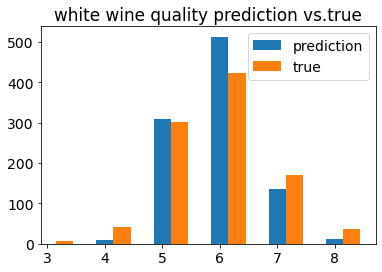

In [462]:
pred_white = rf_C.predict(X_test1)
pred_white_origi = le.inverse_transform(pred_white)
true_white_origi = le.inverse_transform(y_test1)

v1, c1 = np.unique(pred_white_origi, return_counts = True)
v2, c2 = np.unique(true_white_origi, return_counts = True)

width = 0.3
plt.bar(v1, height = c1, width = width, label = 'prediction')
plt.bar(v2 + width, height = c2, width = width, label = 'true')
plt.legend()
plt.title('white wine quality prediction vs.true')
plt.savefig('results/White/RF_classcifier_output')
plt.savefig('figures/white_RF_classcifier_output')


# print(np.unique(pred_white, return_counts = True))
# print(np.unique(y_test1, return_counts = True))
# plt.hist(pred_white, label = 'prediction', histtype = 'step', bottom = 5)
# plt.hist(y_test1, label = 'true', histtype = 'step', bottom = 5)
# plt.legend()

### permutation importance

In [217]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

random.seed(123)

r = permutation_importance(rf, X_test, y_test, n_repeats = 30, random_state = 47, scoring = 'r2')

rf_permutation_result = {}
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        rf_permutation_result[features[i]] = (r.importances_mean[i],r.importances_std[i]) 

permutation_im_rf = pd.DataFrame(rf_permutation_result)
permutation_im_rf.to_csv('results/rf_permutation_im_result(white).csv') 

alcohol 0.325 +/- 0.015
volatile acidity0.162 +/- 0.012
free sulfur dioxide0.115 +/- 0.011
density 0.080 +/- 0.007
chlorides0.064 +/- 0.006
residual sugar0.062 +/- 0.006
total sulfur dioxide0.049 +/- 0.005
pH      0.048 +/- 0.006
citric acid0.040 +/- 0.003
fixed acidity0.033 +/- 0.003
sulphates0.031 +/- 0.004


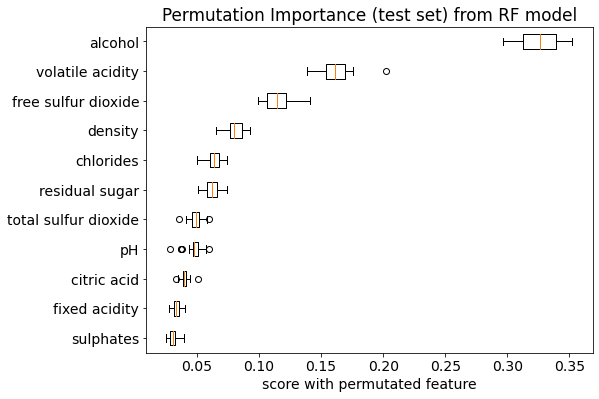

In [218]:
scores = r.importances
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
sorted_indice = np.mean(scores, axis = 1).argsort()

plt.boxplot(x = scores[sorted_indice].T, labels = np.array(features)[sorted_indice], vert = False)
plt.title('Permutation Importance (test set) from RF model')
plt.xlabel('score with permutated feature')
#plt.show()
plt.savefig("figures/feature importance/permutation_importance_RF(white).png")  


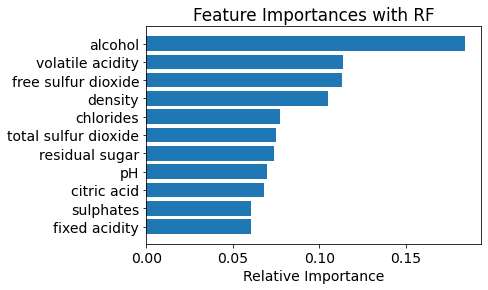

In [219]:
importances = rf.best_estimator_[1].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances with RF')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), np.array(features)[indices])
plt.xlabel('Relative Importance')
plt.savefig("figures/feature importance/buildin_f_importance_RF(white).png")  


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


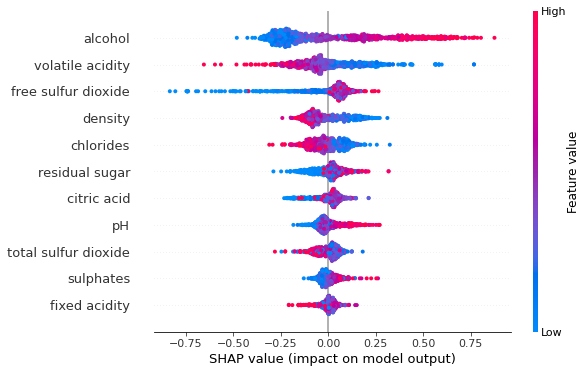

In [220]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf.best_estimator_[1])
X_test_transformed = rf.best_estimator_[0].transform(X_test)
rf_shap_values = explainer.shap_values(X_test_transformed[:1000])
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
shap.summary_plot(rf_shap_values, X_test, show = False)
plt.savefig("figures/feature importance/shap_values_RF(white).png")  


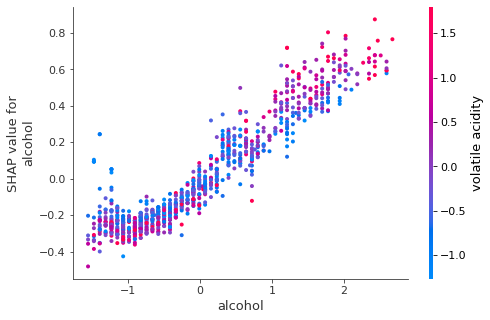

In [221]:
shap.dependence_plot("alcohol", rf_shap_values, X_test_transformed, feature_names = features, show = False)
plt.savefig("figures/feature importance/al_va vs va(white)_RF.png")  


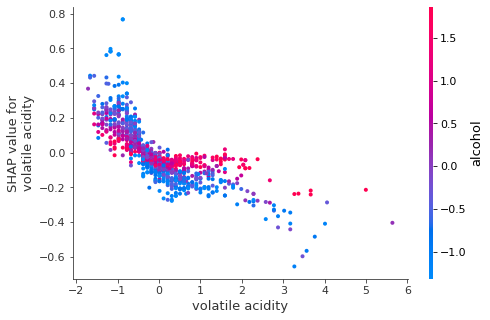

In [222]:
shap.dependence_plot("volatile acidity", rf_shap_values, X_test_transformed, feature_names = features, show = False)
plt.savefig("figures/feature importance/al_va vs al(white)_RF.png")  


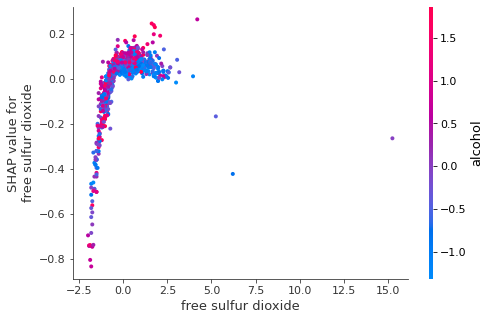

In [223]:
shap.dependence_plot("free sulfur dioxide", rf_shap_values, X_test_transformed, feature_names = features, show = False)
plt.savefig("figures/feature importance/depen_fsd vs al(white)_RF.png")  



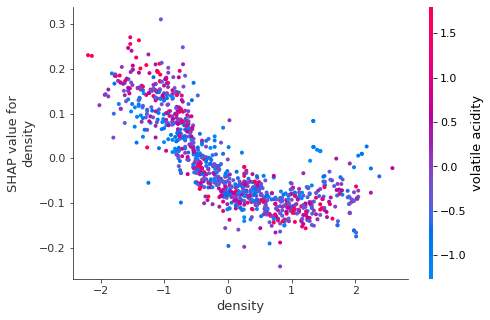

In [224]:
shap.dependence_plot("density", rf_shap_values, X_test_transformed, feature_names = features, show = False)
plt.savefig("figures/feature importance/depen_den vs va(white)_RF.png")  



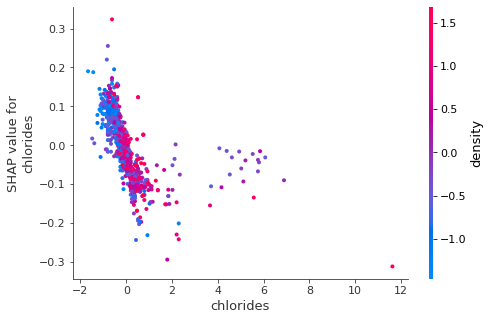

In [225]:
shap.dependence_plot("chlorides", rf_shap_values, X_test_transformed, feature_names = features, show = False)
#plt.savefig("figures/feature importance/depen_den vs va(white)_RF.png") 

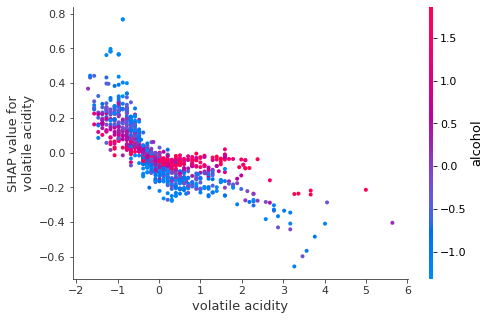

In [226]:
shap.dependence_plot("volatile acidity", rf_shap_values, X_test_transformed, feature_names = features, show = False)
plt.savefig("figures/feature importance/depen_va vs su(white)_RF.png") 

### lasso regression

In [227]:
result_white = {}
result_white_mse = {}

In [228]:
random.seed(123)

preprocessor = StandardScaler() # if you had a more complex dataset, you'd have a ColumnTransformer here
ML_algo = Lasso()
param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
print(scores)
print('mean r2 score of test', np.mean(scores))
result_white["Lasso"] = (np.mean(scores),np.std(scores))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'lasso__alpha': 0.01}
best CV score is 0.2744264257691642
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'lasso__alpha': 0.001}
best CV score is 0.2739639684977747
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'lasso__alpha': 0.001}
best CV score is 0.27057321629446546
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'lasso__alpha': 0.001}
best CV score is 0.27558572212831295
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'lasso__alpha': 0.001}
best CV score is 0.2734856797754429
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'lasso__alpha': 0.001}
best CV score is 0.2805991957539339
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'lasso__alpha': 0.001}
best CV score is 0.2712881771911011
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'lasso__alpha': 0.01}
best CV score is 0.2760721412673597
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'lasso__alpha': 0.001}
best CV score is 0.2802694254496162
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 72
best model is {'lasso__alpha': 0.001}
best CV score is 0.27428398025274026
[0.2697658482741948, 0.2698921256089494, 0.2899604605389796, 0.2648205477650203, 0.28266083013165366, 0.262666125954359, 0.2924831231035555, 0.25521871228038184, 0.2538804715666887, 0.2728834118715864]
mean r2 score of test 0.27142316570953684


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [229]:
random.seed(123)
preprocessor = StandardScaler() # if you had a more complex dataset, you'd have a ColumnTransformer here
ML_algo = Lasso()
param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}


models, scores = MLpipe_KFold_MSE(X_w,y_w,preprocessor,ML_algo,param_grid)
print(scores)
print('mean mse score of test', np.mean(scores))
result_white_mse["Lasso"] = (np.mean(scores),np.std(scores))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'lasso__alpha': 0.001}
best CV score is -0.5647836266160511
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'lasso__alpha': 0.001}
best CV score is -0.5638493399774958
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'lasso__alpha': 0.001}
best CV score is -0.5576675879535785
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'lasso__alpha': 0.01}
best CV score is -0.5701531792887982
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'lasso__alpha': 0.001}
best CV score is -0.5789987314754823
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'lasso__alpha': 0.001}
best CV score is -0.5740784085045959
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'lasso__alpha': 0.001}
best CV score is -0.5711704804676507
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'lasso__alpha': 0.001}
best CV score is -0.566671540345848
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.0s


random_state = 69
best model is {'lasso__alpha': 0.001}
best CV score is -0.5688138011657824
Fitting 5 folds for each of 7 candidates, totalling 35 fits
random_state = 72
best model is {'lasso__alpha': 0.001}
best CV score is -0.5760323910984498
[0.5777562022244823, 0.5856378766929139, 0.6110450252674152, 0.5784734241929672, 0.5310577589367261, 0.5564286298015956, 0.5575576552874799, 0.579730992708645, 0.5738298335834318, 0.537784001528209]
mean mse score of test 0.5689301400223866


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


### ridge regression

In [230]:
from  sklearn.linear_model import Ridge
random.seed(123)

preprocessor = StandardScaler() 
ML_algo = Ridge()

param_grid = {'ridge__alpha': np.logspace(-10, 5,15)}

models, scores =MLpipe_KFold_R2(X_w,y_w,preprocessor,ML_algo,param_grid)
print(scores)
result_white["Ridge"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))

The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.2772119490803795
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.2701410175394744
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'ridge__alpha': 0.4393970560760786}
best CV score is 0.27523693100950825
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'ridge__alpha': 5.179474679231202}
best CV score is 0.28088810111207535
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.2763561149746521
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.2656387069334864
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.274486249983452
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'ridge__alpha': 61.05402296585314}
best CV score is 0.2774449884537454
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'ridge__alpha': 0.4393970560760786}
best CV score is 0.2731199365378828
Fitting 5 folds for each of 15 candidates, totalling 75 fits
random_state = 72
best model is {'ridge__alpha': 0.4393970560760786}
best CV score is 0.28798288336576305
[0.2718345901165431, 0.2940403993510775, 0.27163191206842485, 0.25199407254301065, 0.2700576760371274, 0.3105007420017787, 0.27346422945433646, 0.27999852985391616, 0.28256424966970073, 0.22858810210582725]
mean of the 10 random states test score 0.2734674503201743


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished


In [231]:

models, scores = MLpipe_KFold_MSE(X_w,y_w,preprocessor,ML_algo,param_grid)
print(scores)
print('mean mse score of test', np.mean(scores))
result_white_mse["Ridge"] = (np.mean(scores),np.std(scores))

The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5715672516553191
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5718586848613476
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5691198480686421
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5725553546454634
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5696319511290431
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5707109048572554
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5664378999148367
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5688837113331169
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5713578327691649
Fitting 5 folds for each of 15 candidates, totalling 75 fits
random_state = 72
best model is {'ridge__alpha': 61.05402296585314}
best CV score is -0.5677140537875276
[0.5577428868099356, 0.5603565185300016, 0.5706348105605884, 0.5500643609374641, 0.5655276393438152, 0.5542880293575788, 0.5724261738689741, 0.5680665766538009, 0.5599696173577194, 0.5664105853083282]
mean mse score of test 0.5625487198728207


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished


### random forest

In [232]:
from sklearn.ensemble import RandomForestRegressor
random.seed(123)


preprocessor = StandardScaler() 

ML_algo = RandomForestRegressor()

param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100], 
              'randomforestregressor__max_features': [0.5,0.75,1.0] 
              } 

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)
print(scores)
result_white["RandomForest"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.6s finished


random_state = 7
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4748968513167252
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.8s finished


random_state = 35
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.75}
best CV score is 0.4785489896767244
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.0s finished


random_state = 12
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.75}
best CV score is 0.4679899729336972
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


random_state = 99
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.46603251225892217
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


random_state = 53
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4992691652630931
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


random_state = 14
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.75}
best CV score is 0.46861419553041106
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.2s finished


random_state = 5
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4504228371638474
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


random_state = 49
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.46189427198394417
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


random_state = 69
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.4677757881872416
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


random_state = 72
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is 0.45942919886509664
[0.4825149222107875, 0.4710348084024457, 0.46465524547490766, 0.5335620800290575, 0.3666657788001696, 0.5469154307161451, 0.49151352987468977, 0.5228098553181186, 0.4758166959259036, 0.5002462618802592]
mean of the 10 random states test score 0.4855734608632484
std of the 10 random states test score 0.04753461848082234


In [233]:
models, scores = MLpipe_KFold_MSE(X_w,y_w,preprocessor,ML_algo,param_grid)
print(scores)
print('mean mse score of test', np.mean(scores))
result_white_mse["RandomForest"] = (np.mean(scores),np.std(scores))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.4s finished


random_state = 7
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3894285149400035
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.3s finished


random_state = 35
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.39043424573852525
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.2s finished


random_state = 12
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3928754125615764
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.1s finished


random_state = 99
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3916490302864441
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.1s finished


random_state = 53
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.38424924841009206
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.2s finished


random_state = 14
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.38502822275653553
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.3s finished


random_state = 5
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.38547139964031585
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.3s finished


random_state = 49
best model is {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3883746751412393
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.2s finished


random_state = 69
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.37741488043109966
Fitting 5 folds for each of 15 candidates, totalling 75 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.1s finished


random_state = 72
best model is {'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.5}
best CV score is -0.3923273183986238
[0.3626421003860503, 0.36764551020408165, 0.35429020408163264, 0.36496510204081634, 0.3704916326530613, 0.3642718367346939, 0.3573132653061225, 0.3737408079081633, 0.36956795918367347, 0.3354028571428571]
mean mse score of test 0.3620331275641152


### k nearest neighbors

In [234]:
from sklearn.neighbors import KNeighborsRegressor
random.seed(123)

preprocessor = StandardScaler() 

ML_algo = KNeighborsRegressor()

param_grid = {
              'kneighborsregressor__n_neighbors': [1, 3, 5, 10, 30, 50],
                'kneighborsregressor__weights': ['uniform','distance']
              }

models, scores = MLpipe_KFold_R2(X_r,y_r,preprocessor,ML_algo,param_grid)

result_white["K nearest neighbor"] = (np.mean(scores),np.std(scores))

print('mean of the 10 random states test score', np.mean(scores))
print('std of the 10 random states test score', np.std(scores))
print(scores)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.43229506056638023
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.42670213452833766
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.43287891435907994
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


random_state = 99
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.44509603869233716
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.46102873088242413
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4498025833200844
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4277685095804392
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.44482890378721285
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'kneighborsregressor__n_neighbors': 50, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4445201348646841
Fitting 5 folds for each of 12 candidates, totalling 60 fits
random_state = 72
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is 0.4512380853091802
mean of the 10 random states test score 0.45878075110876776
std of the 10 random states test score 0.035767035999302366
[0.444851839595901, 0.5036328302863247, 0.4866074117255431, 0.4518235141394049, 0.39948605517455427, 0.4022216604413007, 0.5013462845385119, 0.49215704513559444, 0.44768336127106734, 0.45799750877947554]


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


In [235]:
models, scores = MLpipe_KFold_MSE(X_w,y_w,preprocessor,ML_algo,param_grid)
print(scores)
print('mean mse score of test', np.mean(scores))
result_white_mse["knn"] = (np.mean(scores),np.std(scores))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 7
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4154641807144017
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 35
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4045640332464694
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 12
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4037435648684948
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 99
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.3970910504651324
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 53
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4082232719630274
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 14
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4076900367564992
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 5
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4099850290990742
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 49
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.40274660333051465
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
The least populated class in y has only 4 members, which is less than n_splits=5.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


random_state = 69
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.40473645883806986
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    2.4s remaining:    0.7s


random_state = 72
best model is {'kneighborsregressor__n_neighbors': 30, 'kneighborsregressor__weights': 'distance'}
best CV score is -0.4154554473726357
[0.3474287034088418, 0.3745231411609023, 0.398233675418631, 0.3912280565229977, 0.3569452022671414, 0.36917595789111607, 0.357034819619201, 0.41612870913712074, 0.35583328162094136, 0.3673935600597094]
mean mse score of test 0.37339251071066026


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished


In [236]:
result_white

{'Lasso': (0.27142316570953684, 0.012693589122634867),
 'Ridge': (0.2734674503201743, 0.02100724050498656),
 'RandomForest': (0.4855734608632484, 0.04753461848082234),
 'K nearest neighbor': (0.45878075110876776, 0.035767035999302366)}

In [237]:
result_white_mse

{'Lasso': (0.5689301400223866, 0.02247770327545486),
 'Ridge': (0.5625487198728207, 0.006898082654793153),
 'RandomForest': (0.3620331275641152, 0.010498900043767828),
 'knn': (0.37339251071066026, 0.020825829383092832)}

In [238]:
model_compare_mse

{'Lasso': (0.42882867856161083, 0.016564953996207537),
 'Ridge': (0.4263048883568226, 0.024890662841759524),
 'ElasticNet': (0.4150910086834769, 0.021716846521071483),
 'RandomForest': (0.33092065625, 0.019755245831433028),
 'XGB': (0.32025833552260974, 0.03051569332169054),
 'knn': (0.33995734112740617, 0.01346570829245283)}

In [239]:
improve = abs(result_white_mse['RandomForest'][0] - white_base_score )/ white_base_score

In [240]:
print("The model has improved", np.round(improve*100, 2),'% for the white wine dataset')

The model has improved 53.83 % for the white wine dataset


In [241]:
improve_red =  abs(model_compare_mse['RandomForest'][0] - red_base_score )/ red_base_score

In [242]:
print("The model has improved", np.round(improve_red*100, 2),'% for the red wine dataset')

The model has improved 49.23 % for the red wine dataset
